In [10]:
from IPython.display import clear_output
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd 
import subprocess #run R code from subprocess
import numpy as np
from os import listdir # get dir list
from os.path import isfile, join # get dir list


import concurrent.futures
import time
import pickle
import plotly.express as px
import plotly.graph_objects as go

# Meta-base analysis

## Ranking

### Algorithm Distributions

#### With Hyper parameters

In [11]:
metabasesRanking = {'DT': pd.read_csv('Metabases/Metabase_DT.csv.zip', index_col='Dataset'), 'RF': pd.read_csv('Metabases/Metabase_RF.csv.zip', index_col='Dataset'), 'KNN': pd.read_csv('Metabases/Metabase_KNN.csv.zip', index_col='Dataset'),
'SVM': pd.read_csv('Metabases/Metabase_SVM.csv.zip', index_col='Dataset') }
noHyperCols = ['test_f1_macro_mean_AENN-5',
       'test_f1_macro_mean_edgeBoostFilter-15', 'test_f1_macro_mean_PRISM','test_f1_macro_mean_HARF-70',
       'test_f1_macro_mean_GE-5','test_f1_macro_mean_dynamicCF','test_f1_macro_mean_hybridRepairFilter','test_f1_macro_mean_ORBoost-11']
metabasesRankingNoHyper = {'DT': pd.read_csv('Metabases/Metabase_DT.csv.zip', index_col='Dataset')[noHyperCols], 'RF': pd.read_csv('Metabases/Metabase_RF.csv.zip', index_col='Dataset')[noHyperCols], 'KNN': pd.read_csv('Metabases/Metabase_KNN.csv.zip', index_col='Dataset')[noHyperCols],
'SVM': pd.read_csv('Metabases/Metabase_SVM.csv.zip', index_col='Dataset')[noHyperCols] }

In [12]:
DTCols = metabasesRanking['DT'].iloc[:,97:].columns
cols = ['Edge5','Edge20', 'HARF85','Hybrid', 'Edge15',  'OR3','GE9', 'AENN7',
        'HARF75', 'OR19','AENN11', 'AENN9','OR11', 'PRISM','GE3', 'GE7',
        'OR15', 'Dynamic','Edge10', 'HARF80','AENN3', 'HARF90','OR7', 'HARF70',
        'GE5', 'AENN5','GE11']
for i in metabasesRanking:
    metabasesRanking[i] = metabasesRanking[i][DTCols]
    metabasesRanking[i].columns = cols


In [13]:
#Build Ranks
def buildRanks(metabases):
    ranks = {}
    for metabase in metabases:
        ranks[metabase] = pd.DataFrame() 
        # metabases[i]
        for i, value in enumerate(metabases[metabase].index):
            ranks[metabase] = ranks[metabase].append(metabases[metabase].iloc[i].rank(method = 'dense', ascending = False))
    return ranks

# ranks to position ranks

def ranksToPositionRanks(ranks):
    positionsRanks = {}
    
    for rank in ranks:
        positionsRanks[rank] = pd.DataFrame()
        for i in ranks[rank].columns:
            df_temp = pd.DataFrame(ranks[rank][i].value_counts()).sort_index().T
            positionsRanks[rank] = positionsRanks[rank].append(df_temp)
        positionsRanks[rank] = positionsRanks[rank].fillna(0)
    return positionsRanks


In [14]:
display(metabasesRanking['KNN'])
ranks['KNN']

,Edge5,Edge20,HARF85,Hybrid,Edge15,OR3,GE9,AENN7,HARF75,OR19,...,Dynamic,Edge10,HARF80,AENN3,HARF90,OR7,HARF70,GE5,AENN5,GE11
Dataset,,,,,,,,,,,,,,,,,,,,,
1004_synthetic_control_10_0.csv.gz,0.598837,0.946688,0.880442,1.000000,0.878234,1.000000,1.000000,0.988713,0.980010,1.000000,...,0.996590,0.916210,0.961103,0.978341,0.650766,1.000000,0.980010,0.963982,0.978341,1.000000
1004_synthetic_control_10_1.csv.gz,0.706023,0.992051,0.946303,0.990938,0.677480,1.000000,1.000000,0.995953,0.978043,1.000000,...,1.000000,0.698051,0.954708,0.966712,0.812369,1.000000,0.993346,0.985043,0.966712,1.000000
1004_synthetic_control_10_2.csv.gz,0.590378,0.984000,0.878816,1.000000,0.751198,1.000000,1.000000,0.990017,1.000000,1.000000,...,1.000000,0.592129,0.958894,0.970060,0.659186,1.000000,1.000000,0.977559,0.970060,0.996938
1004_synthetic_control_10_3.csv.gz,0.859904,0.951626,0.933944,1.000000,0.951843,1.000000,0.994000,0.995705,0.983130,1.000000,...,1.000000,0.841483,0.968975,0.963917,0.888054,1.000000,0.989764,0.990815,0.963917,0.997058
1004_synthetic_control_10_4.csv.gz,0.554560,0.982119,0.772660,1.000000,0.983090,1.000000,1.000000,0.996529,0.989771,1.000000,...,1.000000,0.694544,0.964192,0.996529,0.674009,1.000000,0.993333,0.981190,0.996529,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997_balance-scale_5_5.csv.gz,0.747525,0.842756,0.778320,0.765990,0.793981,0.821038,0.746618,0.929649,0.774616,0.811944,...,0.820322,0.793981,0.771836,0.884225,0.758025,0.821038,0.786765,0.740294,0.915006,0.747205
997_balance-scale_5_6.csv.gz,0.728268,0.809213,0.741535,0.721590,0.769384,0.810761,0.726451,0.919024,0.746373,0.770505,...,0.799606,0.740048,0.751646,0.884067,0.736532,0.801386,0.788047,0.728459,0.899501,0.734237
997_balance-scale_5_7.csv.gz,0.757928,0.838384,0.746436,0.760346,0.801174,0.826968,0.772662,0.904481,0.776585,0.810345,...,0.800506,0.752374,0.753846,0.882883,0.748482,0.814224,0.755054,0.747297,0.898837,0.759116


,Edge5,Edge20,HARF85,Hybrid,Edge15,OR3,GE9,AENN7,HARF75,OR19,...,Dynamic,Edge10,HARF80,AENN3,HARF90,OR7,HARF70,GE5,AENN5,GE11
1004_synthetic_control_10_0.csv.gz,17.0,10.0,14.0,1.0,15.0,1.0,1.0,5.0,6.0,1.0,...,2.0,13.0,9.0,7.0,16.0,1.0,6.0,8.0,7.0,1.0
1004_synthetic_control_10_1.csv.gz,15.0,5.0,12.0,6.0,17.0,1.0,1.0,3.0,8.0,1.0,...,1.0,16.0,11.0,9.0,14.0,1.0,4.0,7.0,9.0,1.0
1004_synthetic_control_10_2.csv.gz,17.0,7.0,12.0,1.0,14.0,1.0,1.0,6.0,1.0,1.0,...,1.0,16.0,10.0,9.0,15.0,1.0,1.0,8.0,9.0,2.0
1004_synthetic_control_10_3.csv.gz,17.0,13.0,15.0,1.0,12.0,1.0,4.0,3.0,8.0,1.0,...,1.0,18.0,9.0,11.0,16.0,1.0,6.0,5.0,11.0,2.0
1004_synthetic_control_10_4.csv.gz,14.0,6.0,11.0,1.0,5.0,1.0,1.0,2.0,4.0,1.0,...,1.0,12.0,10.0,2.0,13.0,1.0,3.0,7.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997_balance-scale_5_5.csv.gz,19.0,6.0,13.0,16.0,10.0,7.0,21.0,2.0,14.0,9.0,...,8.0,10.0,15.0,5.0,18.0,7.0,11.0,22.0,4.0,20.0
997_balance-scale_5_6.csv.gz,21.0,7.0,16.0,24.0,12.0,6.0,22.0,3.0,15.0,11.0,...,9.0,17.0,13.0,5.0,18.0,8.0,10.0,20.0,4.0,19.0
997_balance-scale_5_7.csv.gz,17.0,6.0,24.0,15.0,10.0,7.0,13.0,3.0,12.0,9.0,...,11.0,21.0,20.0,5.0,22.0,8.0,19.0,23.0,4.0,16.0
997_balance-scale_5_8.csv.gz,20.0,6.0,17.0,16.0,6.0,8.0,15.0,1.0,12.0,8.0,...,7.0,10.0,13.0,5.0,21.0,8.0,11.0,19.0,4.0,18.0


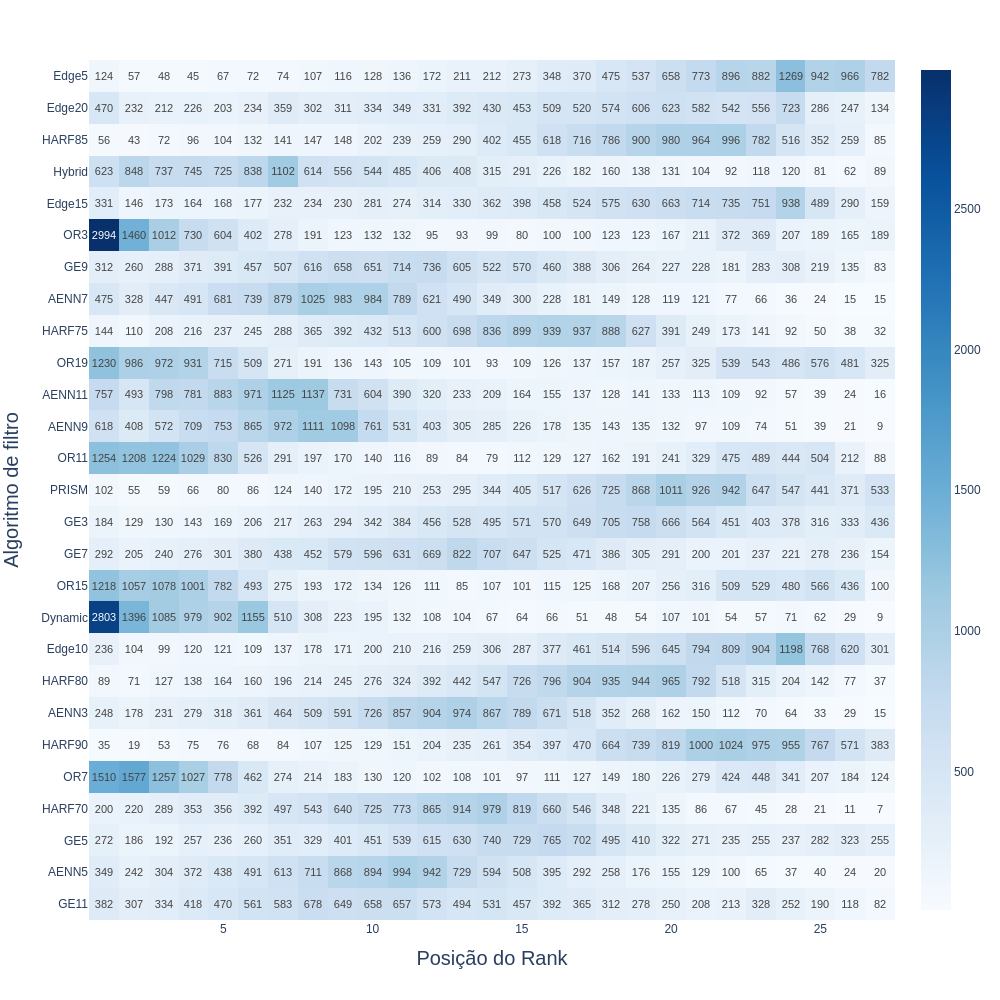

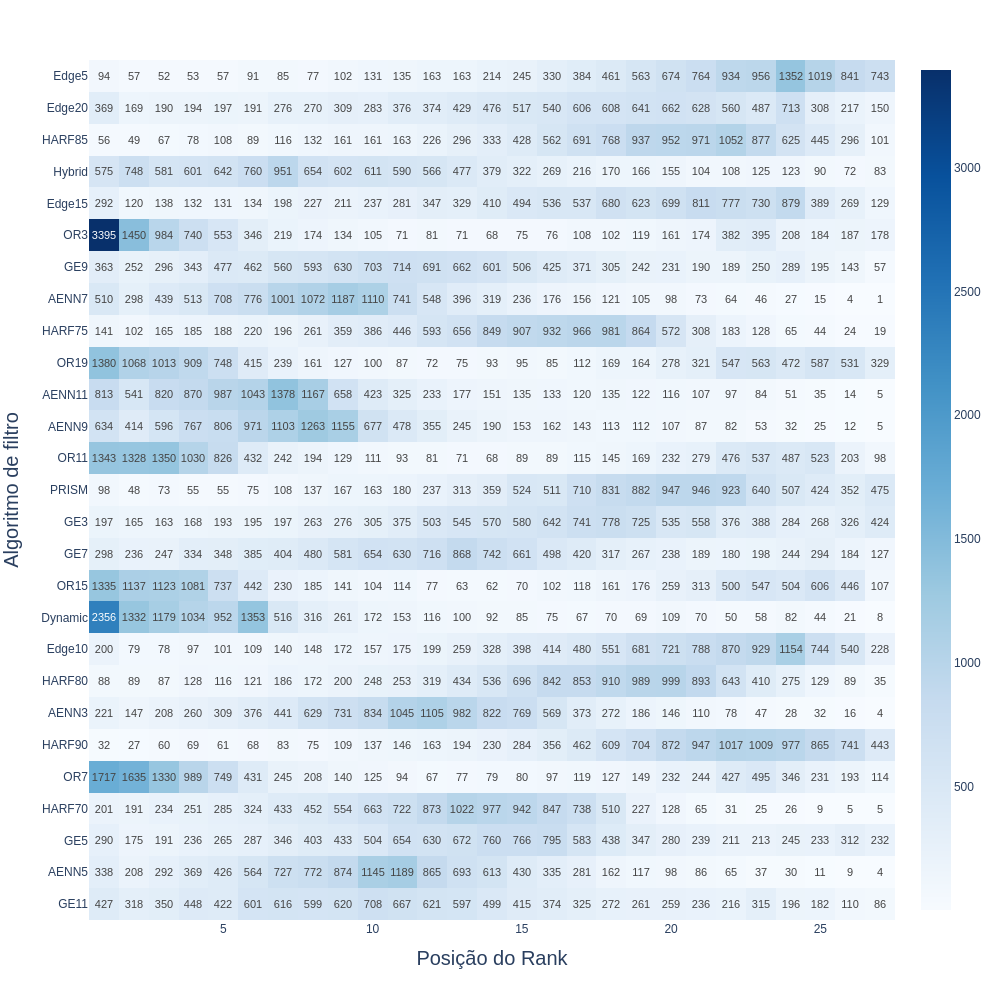

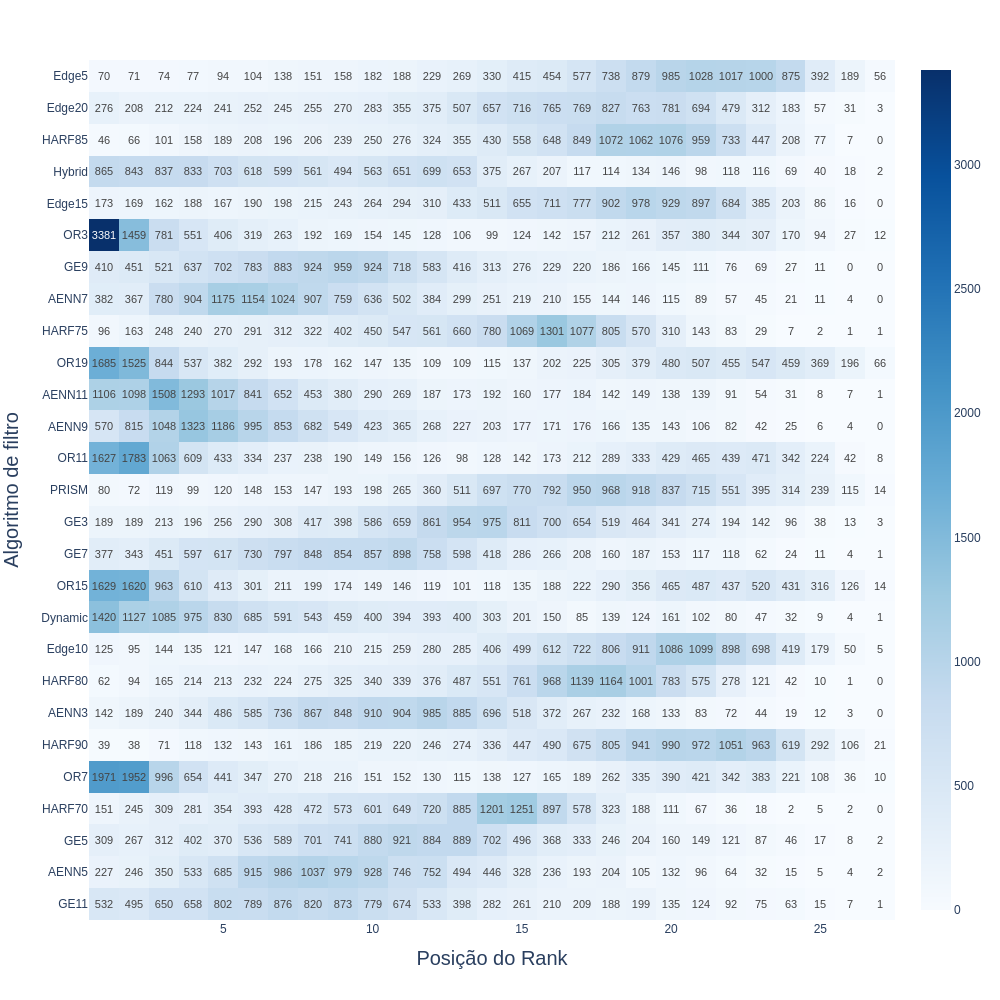

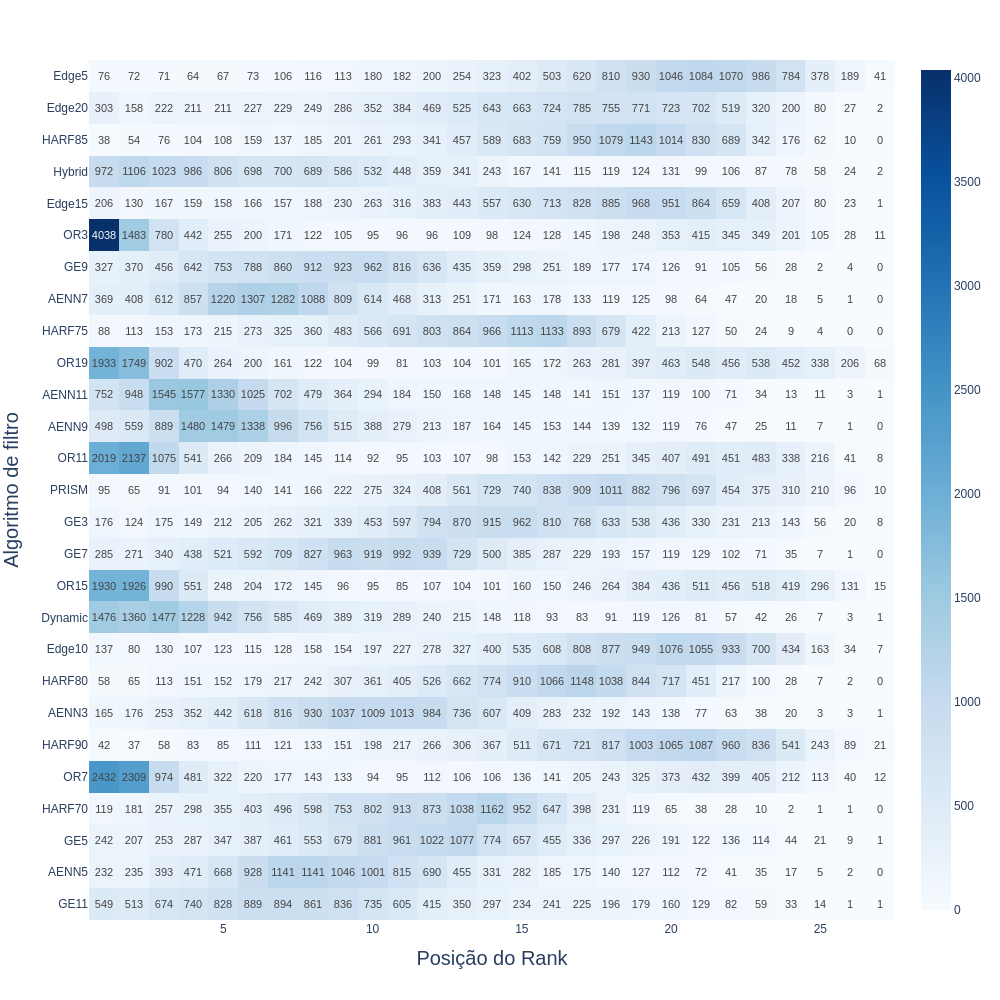

In [15]:
ranks = buildRanks(metabasesRanking)
postionsRanks = ranksToPositionRanks(ranks)
for i in postionsRanks:
    fig = px.imshow(postionsRanks[i], text_auto=True, aspect="auto", color_continuous_scale=px.colors.sequential.Blues)
    fig.update_layout(
        autosize=False,
        width=800,
        height=1000,
        yaxis=dict(
            title_text="Algoritmo de filtro",
            titlefont=dict(size=20),
        ),
        xaxis=dict(
            title_text="Posição do Rank",
            titlefont=dict(size=20),
        ),
        showlegend=False
    )
    fig.show(renderer="png", width=1000,
        height=1000)
    # display(postionsRanks[i])

#### Without HyperParameters

In [16]:
noHyperCols = ['test_f1_macro_mean_AENN-5',
       'test_f1_macro_mean_edgeBoostFilter-15', 'test_f1_macro_mean_PRISM','test_f1_macro_mean_HARF-70',
       'test_f1_macro_mean_GE-5','test_f1_macro_mean_dynamicCF','test_f1_macro_mean_hybridRepairFilter','test_f1_macro_mean_ORBoost-11']
# metabasesRankingNoHyper = {'DT': pd.read_csv('Metabases/Metabase_DT.csv.zip', index_col='Dataset')[noHyperCols], 'RF': pd.read_csv('Metabases/Metabase_RF.csv.zip', index_col='Dataset')[noHyperCols], 'KNN': pd.read_csv('Metabases/Metabase_KNN.csv.zip', index_col='Dataset')[noHyperCols] }
metabasesRankingNoHyper = {'DT': pd.read_csv('Metabases/Metabase_DT.csv.zip', index_col='Dataset')[noHyperCols], 'RF': pd.read_csv('Metabases/Metabase_RF.csv.zip', index_col='Dataset')[noHyperCols], 'KNN': pd.read_csv('Metabases/Metabase_KNN.csv.zip', index_col='Dataset')[noHyperCols],
'SVM': pd.read_csv('Metabases/Metabase_SVM.csv.zip', index_col='Dataset')[noHyperCols] }
cols = [ 'AENN', 'Edge', 'PRISM', 'HARF', 'GE',  'Dynamic', 'Hybrid','ORBoost']
       #  ['GE', 'AENN', 'HARF', 'Edge', 'PRISM', 'Hybrid',  'ORBoost', 'Dynamic']
       #  [ 'AENN', 'Edge', 'PRISM', 'HARF', 'GE',  'Dynamic', 'Hybrid','ORBoost']
for i in metabasesRankingNoHyper:
    metabasesRankingNoHyper[i].columns = cols
    metabasesRankingNoHyper[i] = metabasesRankingNoHyper[i][['GE', 'AENN', 'HARF', 'Edge', 'PRISM', 'Hybrid',  'ORBoost', 'Dynamic']]

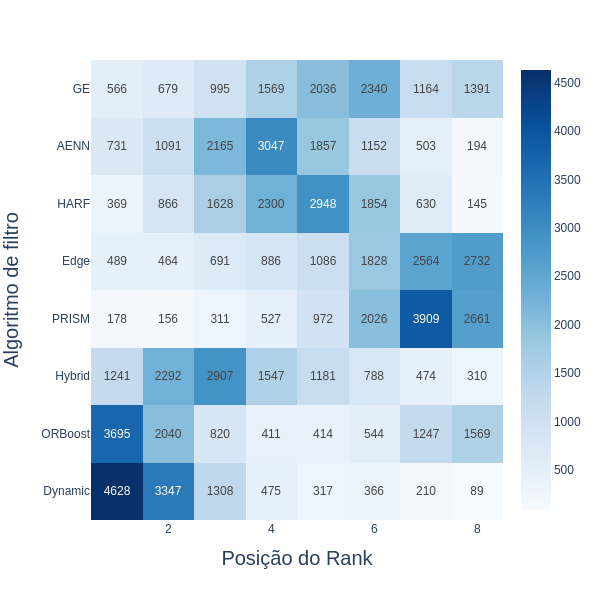

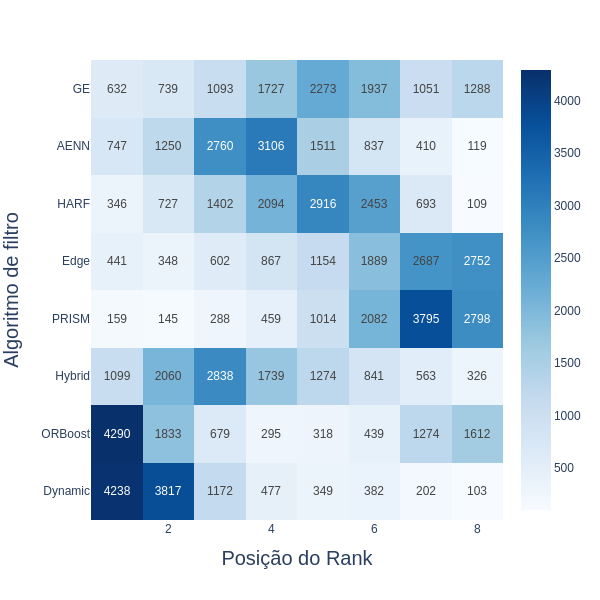

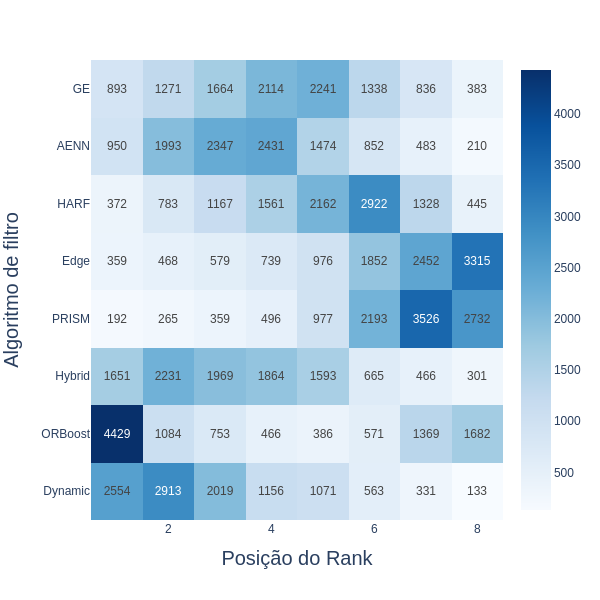

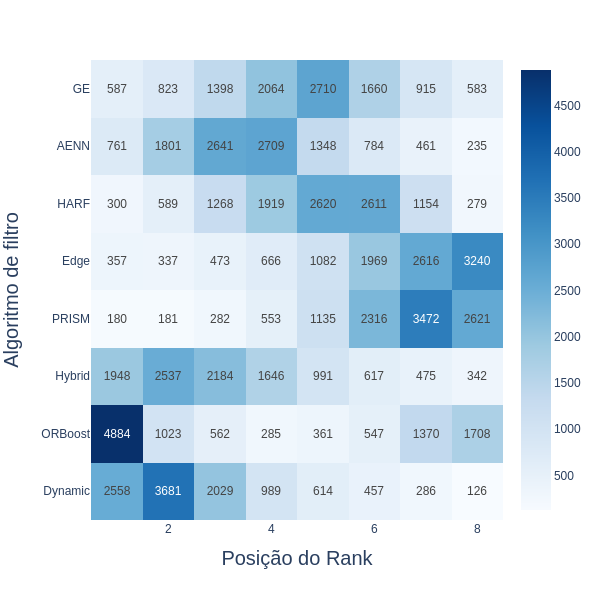

In [17]:
ranksNoHyper = buildRanks(metabasesRankingNoHyper)
postionsRanksNoHyper = ranksToPositionRanks(ranksNoHyper)
for i in postionsRanksNoHyper:
    fig = px.imshow(postionsRanksNoHyper[i], text_auto=True, aspect="auto", color_continuous_scale=px.colors.sequential.Blues)
    fig.update_layout(
        autosize=False,
        width=800,
        height=1000,
        yaxis=dict(
            title_text="Algoritmo de filtro",
            titlefont=dict(size=20),
        ),
        xaxis=dict(
            title_text="Posição do Rank",
            titlefont=dict(size=20),
        ),
        showlegend=False
    )
    fig.show(renderer="png", width=600,
        height=600)
    # display(postionsRanks[i])

## Gain produced by algorithm

In [18]:
noFilterResults = pd.read_csv('Results/NoisyDatasets_resultsDT.csv.zip', index_col='Unnamed: 0')
noFilterResults = noFilterResults.rename(columns={'test_f1_macro_mean': 'noFilter-f1'})
noFilterResults.index.name='Dataset'
noFilterResults['noFilter-f1'].sort_index()

Dataset
1004_synthetic_control_10_0.csv.gz    0.560598
1004_synthetic_control_10_1.csv.gz    0.584493
1004_synthetic_control_10_2.csv.gz    0.523056
1004_synthetic_control_10_3.csv.gz    0.603713
1004_synthetic_control_10_4.csv.gz    0.514328
                                        ...   
997_balance-scale_5_5.csv.gz          0.502763
997_balance-scale_5_6.csv.gz          0.531294
997_balance-scale_5_7.csv.gz          0.495785
997_balance-scale_5_8.csv.gz          0.462676
997_balance-scale_5_9.csv.gz          0.473048
Name: noFilter-f1, Length: 10740, dtype: float64

In [19]:
# metabasesRanking = {'DT': pd.read_csv('Metabases/Metabase_DT.csv.zip', index_col='Dataset'), 'RF': pd.read_csv('Metabases/Metabase_RF.csv.zip', index_col='Dataset'), 'KNN': pd.read_csv('Metabases/Metabase_KNN.csv.zip', index_col='Dataset') }
metabasesRanking = {'DT': pd.read_csv('Metabases/Metabase_DT.csv.zip', index_col='Dataset'), 'RF': pd.read_csv('Metabases/Metabase_RF.csv.zip', index_col='Dataset'), 'KNN': pd.read_csv('Metabases/Metabase_KNN.csv.zip', index_col='Dataset'),
'SVM': pd.read_csv('Metabases/Metabase_SVM.csv.zip', index_col='Dataset') }
DTCols = metabasesRanking['DT'].iloc[:,97:].columns
cols = ['Edge5','Edge20', 'HARF85','Hybrid', 'Edge15',  'OR3','GE9', 'AENN7',
        'HARF75', 'OR19','AENN11', 'AENN9','OR11', 'PRISM','GE3', 'GE7',
        'OR15', 'Dynamic','Edge10', 'HARF80','AENN3', 'HARF90','OR7', 'HARF70',
        'GE5', 'AENN5','GE11']
for i in metabasesRanking:
    metabasesRanking[i] = metabasesRanking[i][DTCols]
    metabasesRanking[i].columns = cols

for i in metabasesRanking:
    noFilterResults = pd.read_csv(f'Results/NoisyDatasets_results{i}.csv.zip', index_col='Unnamed: 0')
    noFilterResults = noFilterResults.rename(columns={'test_f1_macro_mean': 'noFilterResults'})
    noFilterResults.index.name='Dataset'
    metabasesRanking[i]['noFilterResults'] = noFilterResults['noFilterResults'].sort_index()

In [20]:
metabasesRanking['KNN']

,Edge5,Edge20,HARF85,Hybrid,Edge15,OR3,GE9,AENN7,HARF75,OR19,...,Edge10,HARF80,AENN3,HARF90,OR7,HARF70,GE5,AENN5,GE11,noFilterResults
Dataset,,,,,,,,,,,,,,,,,,,,,
1004_synthetic_control_10_0.csv.gz,0.598837,0.946688,0.880442,1.000000,0.878234,1.000000,1.000000,0.988713,0.980010,1.000000,...,0.916210,0.961103,0.978341,0.650766,1.000000,0.980010,0.963982,0.978341,1.000000,0.504944
1004_synthetic_control_10_1.csv.gz,0.706023,0.992051,0.946303,0.990938,0.677480,1.000000,1.000000,0.995953,0.978043,1.000000,...,0.698051,0.954708,0.966712,0.812369,1.000000,0.993346,0.985043,0.966712,1.000000,0.658061
1004_synthetic_control_10_2.csv.gz,0.590378,0.984000,0.878816,1.000000,0.751198,1.000000,1.000000,0.990017,1.000000,1.000000,...,0.592129,0.958894,0.970060,0.659186,1.000000,1.000000,0.977559,0.970060,0.996938,0.543208
1004_synthetic_control_10_3.csv.gz,0.859904,0.951626,0.933944,1.000000,0.951843,1.000000,0.994000,0.995705,0.983130,1.000000,...,0.841483,0.968975,0.963917,0.888054,1.000000,0.989764,0.990815,0.963917,0.997058,0.714470
1004_synthetic_control_10_4.csv.gz,0.554560,0.982119,0.772660,1.000000,0.983090,1.000000,1.000000,0.996529,0.989771,1.000000,...,0.694544,0.964192,0.996529,0.674009,1.000000,0.993333,0.981190,0.996529,1.000000,0.532098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997_balance-scale_5_5.csv.gz,0.747525,0.842756,0.778320,0.765990,0.793981,0.821038,0.746618,0.929649,0.774616,0.811944,...,0.793981,0.771836,0.884225,0.758025,0.821038,0.786765,0.740294,0.915006,0.747205,0.717093
997_balance-scale_5_6.csv.gz,0.728268,0.809213,0.741535,0.721590,0.769384,0.810761,0.726451,0.919024,0.746373,0.770505,...,0.740048,0.751646,0.884067,0.736532,0.801386,0.788047,0.728459,0.899501,0.734237,0.703379
997_balance-scale_5_7.csv.gz,0.757928,0.838384,0.746436,0.760346,0.801174,0.826968,0.772662,0.904481,0.776585,0.810345,...,0.752374,0.753846,0.882883,0.748482,0.814224,0.755054,0.747297,0.898837,0.759116,0.722995


In [21]:
gain = {}
for i in metabasesRanking:
    gain[i] = metabasesRanking[i].sub(metabasesRanking[i]['noFilterResults'], axis=0)
    gain[i].drop('noFilterResults', axis = 1, inplace = True)


In [22]:
def displayGainChart(gain):
    fig = go.Figure()
    for i in gain:
        fig.add_trace(go.Bar(
            x = gain[i].sum().index,
            y = gain[i].sum().values,
            name = i
        ))
    fig.update_layout(
        autosize=False,
        width=800,
        height=1000,
        yaxis=dict(
            title_text="Soma do ganho dos algoritmos",
            titlefont=dict(size=20),
        ),
        xaxis=dict(
            title_text="Algoritmo de Filtro",
            titlefont=dict(size=20),
        ),
        # showlegend=False
    )
    fig.show(renderer="png", width=2000,
            height=900)
    

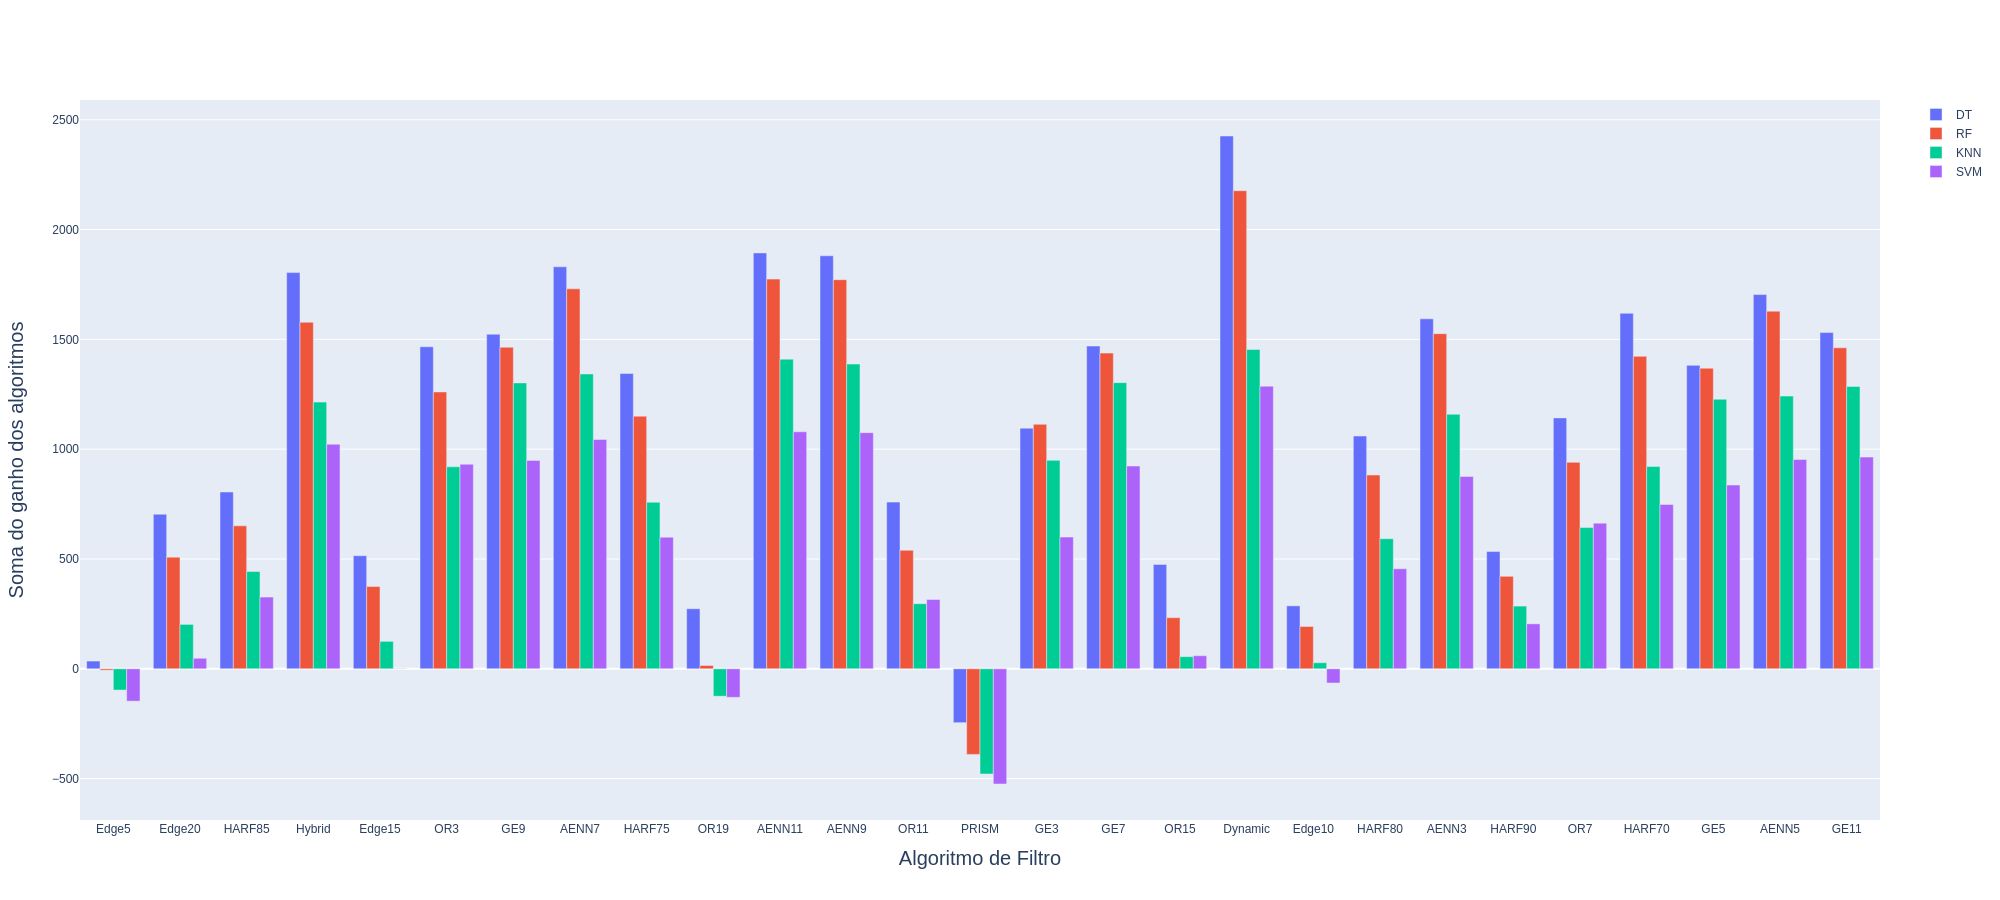

In [23]:
displayGainChart(gain)

In [24]:
(gain['DT'] > 0)['Dynamic'].value_counts()[True]

10015

In [25]:
effectsOnF1 = {}
for i in gain:
    quantity = {}
    for column in gain[i].columns:
        positivo = (gain[i] > 0)[column].value_counts()[True]
        negativo = (gain[i] < 0)[column].value_counts()[True]
        neutro = 10740 -positivo - negativo
        quantity[column] = [positivo, negativo, neutro]
    
    effectsOnF1[i] = pd.DataFrame.from_dict(quantity, orient='index', columns=['Positivo', 'Negativo', 'Neutro'])

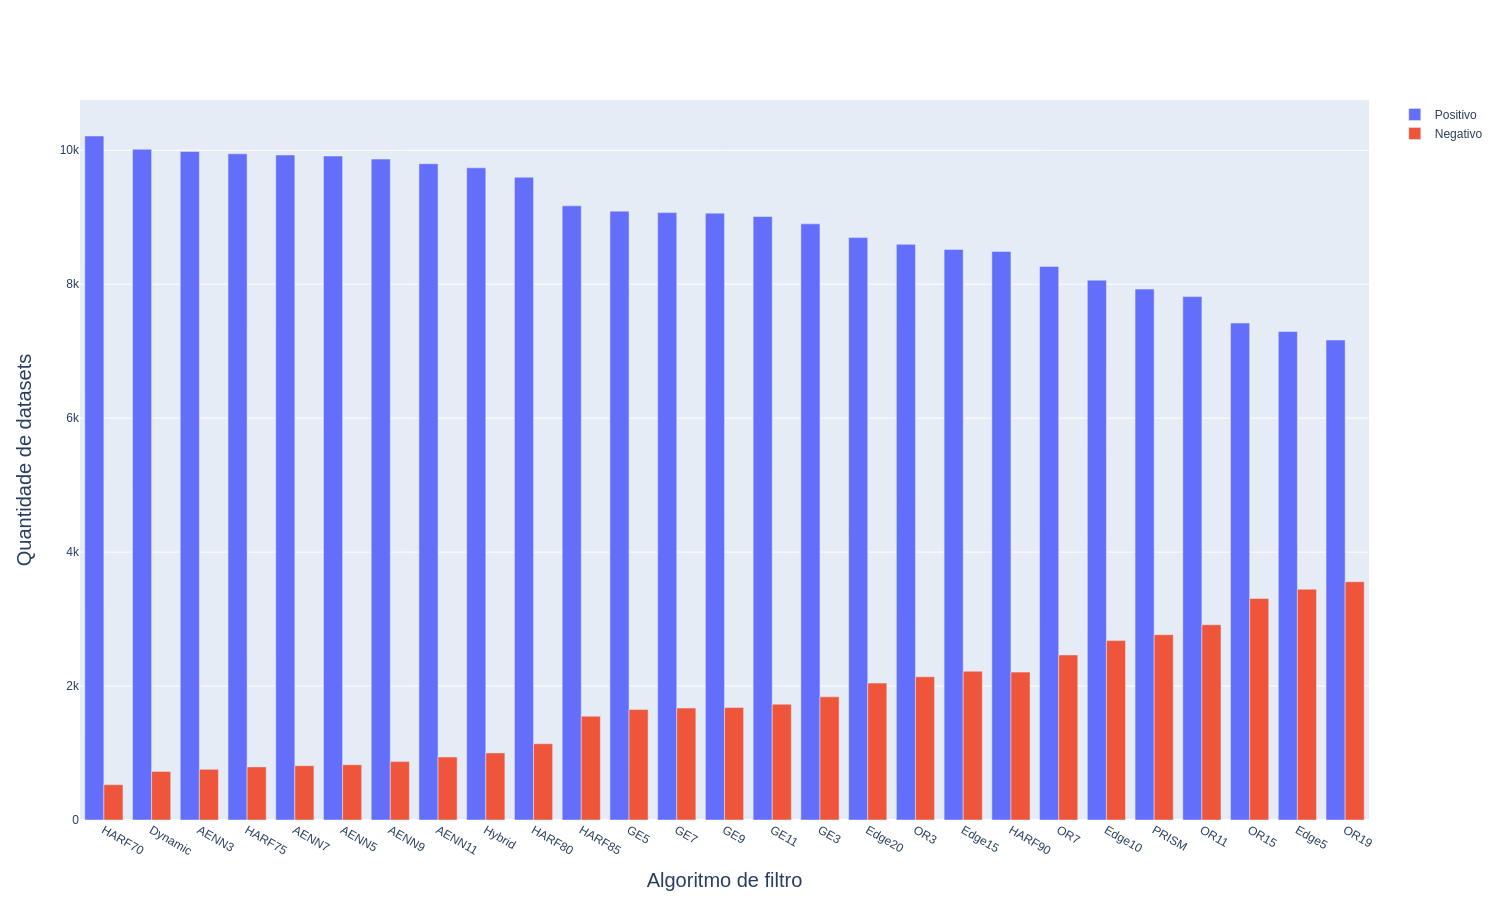

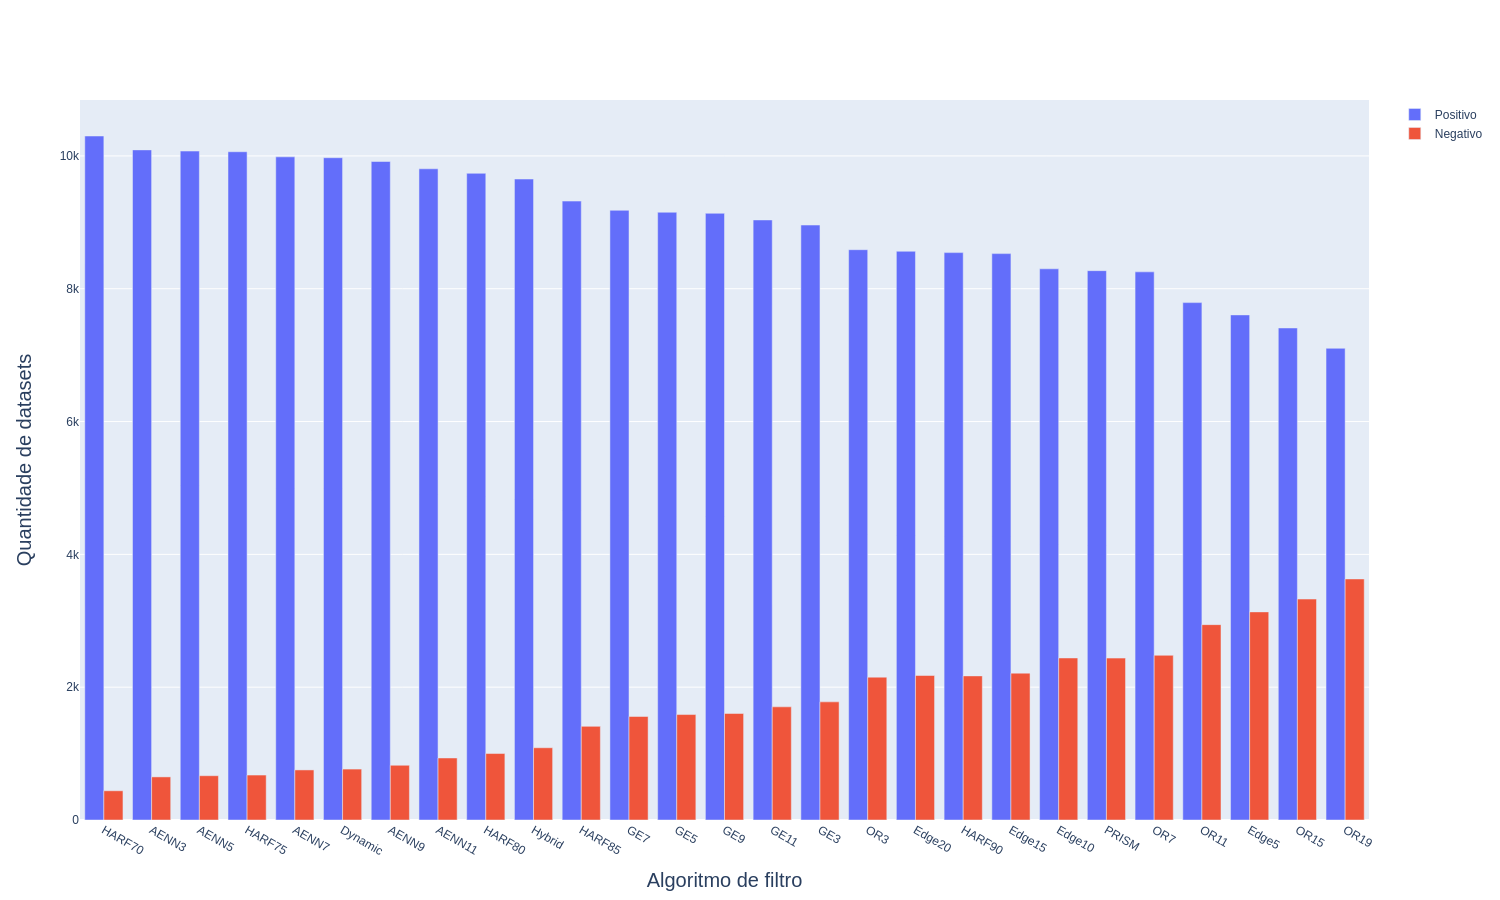

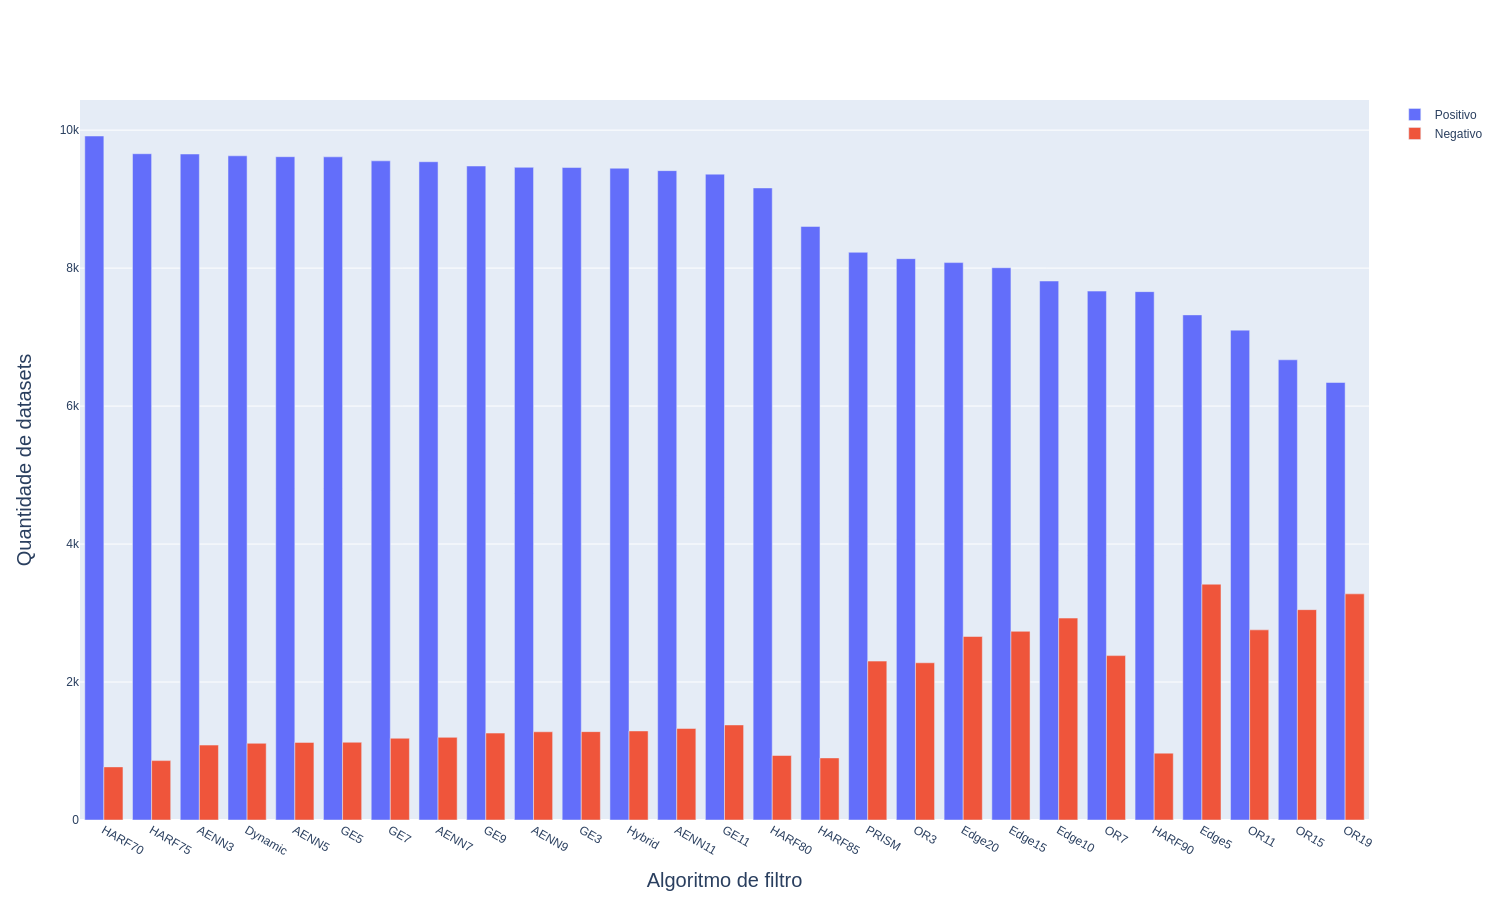

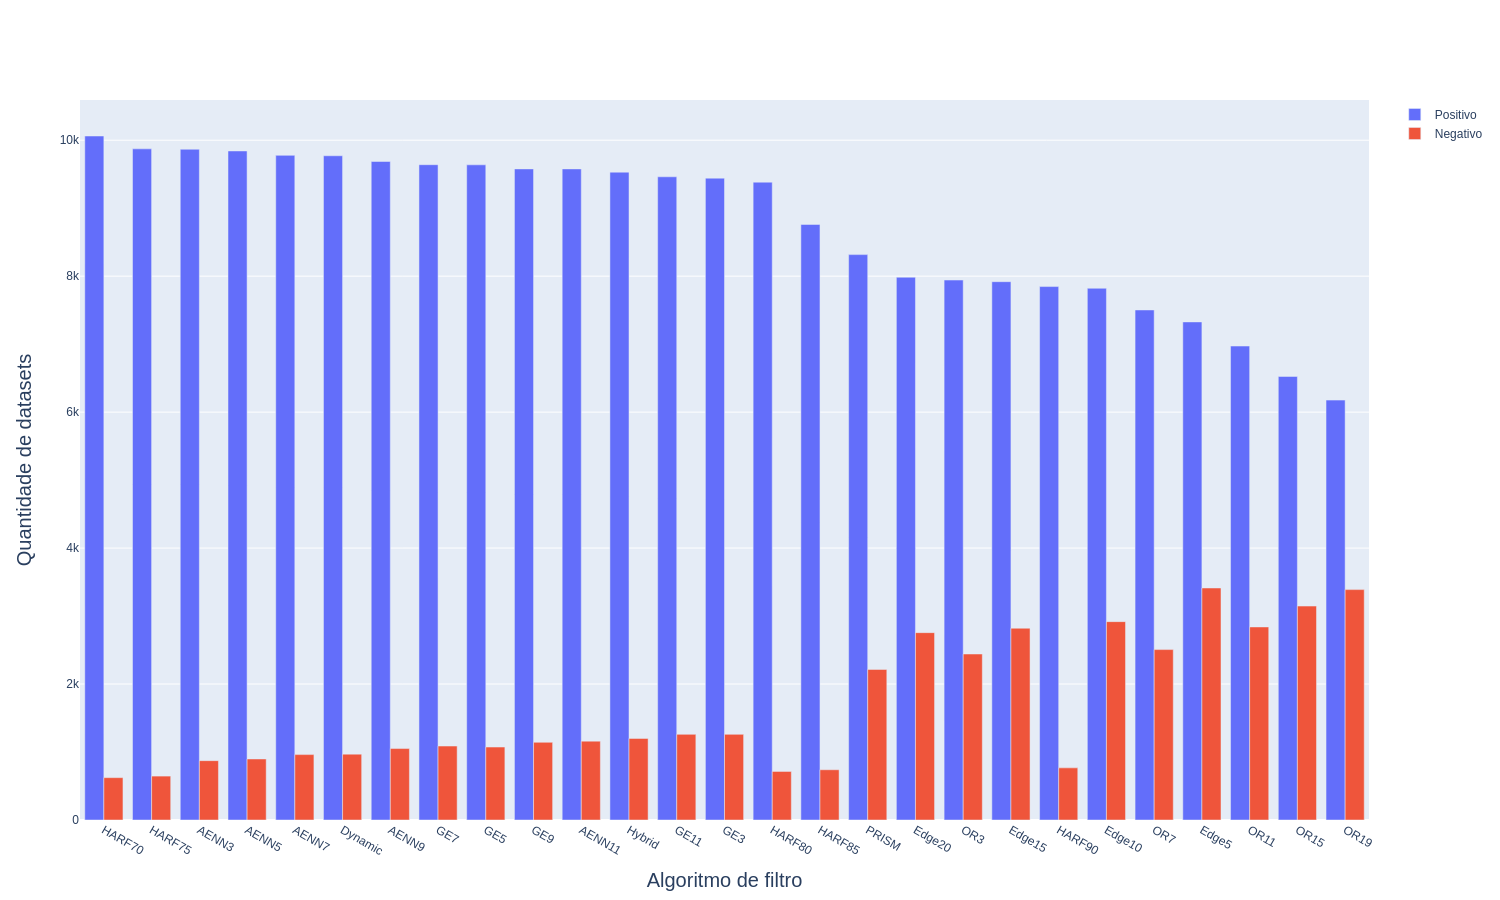

In [26]:
effectsOnF1['DT']
for i in effectsOnF1:
    effectsOnF1[i].sort_values(by=['Positivo'], ascending=False, inplace = True)
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x = effectsOnF1[i].index,
        y = effectsOnF1[i]['Positivo'].values,
        name = 'Positivo'
    ))
    fig.add_trace(go.Bar(
        x = effectsOnF1[i].index,
        y = effectsOnF1[i]['Negativo'].values,
        name = 'Negativo'
    ))
    fig.update_layout(
        autosize=False,
        width=800,
        height=1000,
        yaxis=dict(
            title_text="Quantidade de datasets",
            titlefont=dict(size=20),
        ),
        xaxis=dict(
            title_text="Algoritmo de filtro",
            titlefont=dict(size=20),
        ),
    )
    fig.show(renderer="png", width=1500,
            height=900)

## Multiple Classifier (tree like)

In [27]:
pd.read_csv(f'Metabases/Metabase_DT.csv.zip', index_col='Dataset').iloc[:,97:]

,test_f1_macro_mean_edgeBoostFilter-5,test_f1_macro_mean_edgeBoostFilter-20,test_f1_macro_mean_HARF-85,test_f1_macro_mean_hybridRepairFilter,test_f1_macro_mean_edgeBoostFilter-15,test_f1_macro_mean_ORBoost-3,test_f1_macro_mean_GE-9,test_f1_macro_mean_AENN-7,test_f1_macro_mean_HARF-75,test_f1_macro_mean_ORBoost-19,...,test_f1_macro_mean_dynamicCF,test_f1_macro_mean_edgeBoostFilter-10,test_f1_macro_mean_HARF-80,test_f1_macro_mean_AENN-3,test_f1_macro_mean_HARF-90,test_f1_macro_mean_ORBoost-7,test_f1_macro_mean_HARF-70,test_f1_macro_mean_GE-5,test_f1_macro_mean_AENN-5,test_f1_macro_mean_GE-11
Dataset,,,,,,,,,,,,,,,,,,,,,
1004_synthetic_control_10_0.csv.gz,0.586866,0.932846,0.814147,0.936453,0.795786,0.971940,0.912165,0.939236,0.931990,0.957658,...,0.964651,0.785559,0.867923,0.886801,0.570802,0.942136,0.939612,0.811558,0.870598,0.879085
1004_synthetic_control_10_1.csv.gz,0.629127,0.957985,0.831395,0.900882,0.572895,0.936486,0.912165,0.923631,0.941075,0.898651,...,0.964829,0.559755,0.864842,0.792726,0.671747,0.869834,0.903200,0.899262,0.848646,0.913513
1004_synthetic_control_10_2.csv.gz,0.580363,0.952054,0.767520,0.959666,0.719631,0.963370,0.902216,0.935797,0.967970,0.960155,...,0.970423,0.542222,0.841676,0.887069,0.630128,0.962819,0.973680,0.843487,0.900485,0.903766
1004_synthetic_control_10_3.csv.gz,0.729294,0.840657,0.862629,0.962733,0.843671,0.951542,0.930469,0.950500,0.917923,0.901389,...,0.911309,0.698734,0.888143,0.870206,0.744442,0.951542,0.904076,0.890814,0.861553,0.912285
1004_synthetic_control_10_4.csv.gz,0.574948,0.908058,0.714637,0.921440,0.880368,0.859102,0.915227,0.888076,0.898159,0.913666,...,0.927307,0.675416,0.936813,0.862662,0.614654,0.929083,0.909805,0.879535,0.906637,0.875103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997_balance-scale_5_5.csv.gz,0.485540,0.558748,0.594710,0.597701,0.485111,0.620371,0.614913,0.718459,0.586189,0.637853,...,0.651579,0.487275,0.578445,0.722445,0.515733,0.630931,0.579545,0.596068,0.735181,0.619538
997_balance-scale_5_6.csv.gz,0.510978,0.697462,0.586650,0.586908,0.576325,0.638946,0.592843,0.713115,0.606763,0.639047,...,0.653752,0.498621,0.616080,0.725088,0.589297,0.640562,0.619080,0.610145,0.701347,0.624082
997_balance-scale_5_7.csv.gz,0.535679,0.650123,0.561552,0.611043,0.556948,0.613788,0.627105,0.736920,0.625139,0.622481,...,0.709290,0.549880,0.568968,0.733404,0.558672,0.626800,0.608986,0.584212,0.736138,0.625725


### With Hyper parameters

In [28]:
# metabasesMultipleClass = {'DT': pd.read_csv('Metabases/metabases_Multiple_Classifiers/Metabase_DT.csv.zip', index_col='Dataset'), 'RF': pd.read_csv('Metabases/metabases_Multiple_Classifiers/Metabase_RF.csv.zip', index_col='Dataset'), 'KNN': pd.read_csv('Metabases/metabases_Multiple_Classifiers/Metabase_KNN.csv.zip', index_col='Dataset') }
metabasesMultipleClass = {'DT': pd.read_csv('Metabases/metabases_Multiple_Classifiers/Metabase_DT.csv.zip', index_col='Dataset'), 'RF': pd.read_csv('Metabases/metabases_Multiple_Classifiers/Metabase_RF.csv.zip', index_col='Dataset'), 'KNN': pd.read_csv('Metabases/metabases_Multiple_Classifiers/Metabase_KNN.csv.zip', index_col='Dataset'),
'SVM': pd.read_csv('Metabases/metabases_Multiple_Classifiers/Metabase_SVM.csv.zip', index_col='Dataset') }


def displayChartAlgoDistribution(metabasesMultipleClass, columnsName):
    fig = go.Figure()
    for i in metabasesMultipleClass:
        fig.add_trace(go.Bar(
        x = metabasesMultipleClass[i][columnsName].value_counts().index,
        y = metabasesMultipleClass[i][columnsName].value_counts().values,
        name= f'{i}'
        ))
    fig.update_layout(
        autosize=False,
        width=800,
        height=1000,
        yaxis=dict(
            title_text="Quantidade de datasets",
            titlefont=dict(size=20),
        ),
        xaxis=dict(
            title_text="Algoritmo",
            titlefont=dict(size=20),
        ),
    )
    fig.show(renderer="png", width=600,
            height=400)

#### Best Algo type distributions

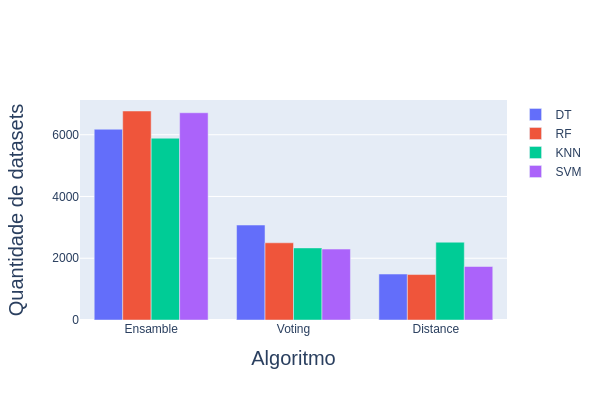

In [29]:
displayChartAlgoDistribution(metabasesMultipleClass, 'BestType')

#### Best voting algo distributions

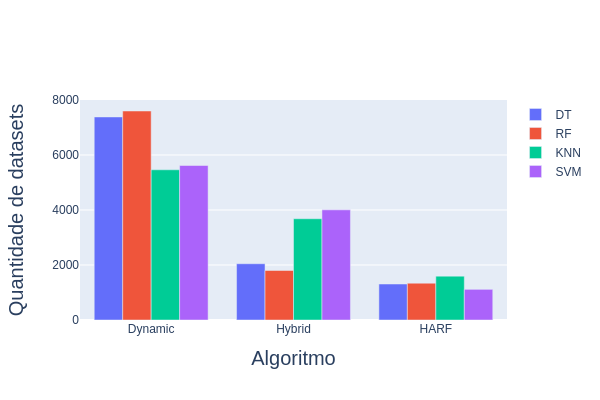

In [30]:
displayChartAlgoDistribution(metabasesMultipleClass, 'BestVotingAlgo')


#### Best Ensamble algo distributions

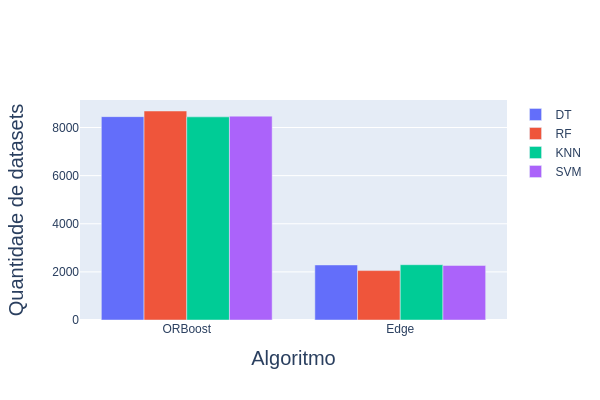

In [31]:
displayChartAlgoDistribution(metabasesMultipleClass, 'BestEnsambleAlgo')

#### Best Distance algo distributions

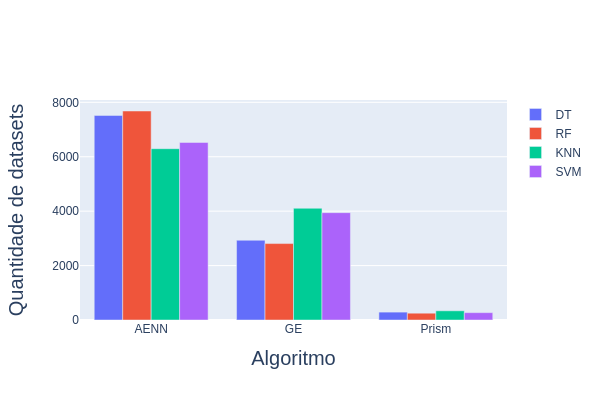

In [32]:
displayChartAlgoDistribution(metabasesMultipleClass, 'BestDistanceAlgo')

### Without hyper parameters

In [33]:
# metabasesMultipleClassNoHyper = {'DT': pd.read_csv('Metabases/metabases_Multiple_Classifiers/Metabase_DT_NoHyper.csv.zip', index_col='Dataset'), 'RF': pd.read_csv('Metabases/metabases_Multiple_Classifiers/Metabase_RF_NoHyper.csv.zip', index_col='Dataset'), 'KNN': pd.read_csv('Metabases/metabases_Multiple_Classifiers/Metabase_KNN_NoHyper.csv.zip', index_col='Dataset') }
metabasesMultipleClassNoHyper = {'DT': pd.read_csv('Metabases/metabases_Multiple_Classifiers/Metabase_DT_NoHyper.csv.zip', index_col='Dataset'), 'RF': pd.read_csv('Metabases/metabases_Multiple_Classifiers/Metabase_RF_NoHyper.csv.zip', index_col='Dataset'), 'KNN': pd.read_csv('Metabases/metabases_Multiple_Classifiers/Metabase_KNN_NoHyper.csv.zip', index_col='Dataset'),
'SVM': pd.read_csv('Metabases/metabases_Multiple_Classifiers/Metabase_SVM_NoHyper.csv.zip', index_col='Dataset') }

#### Best Algo type distributions

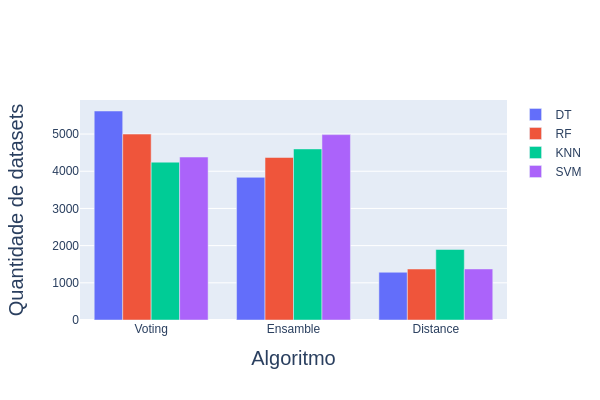

In [34]:
displayChartAlgoDistribution(metabasesMultipleClassNoHyper, 'BestType')

#### Best Voting algo distributions

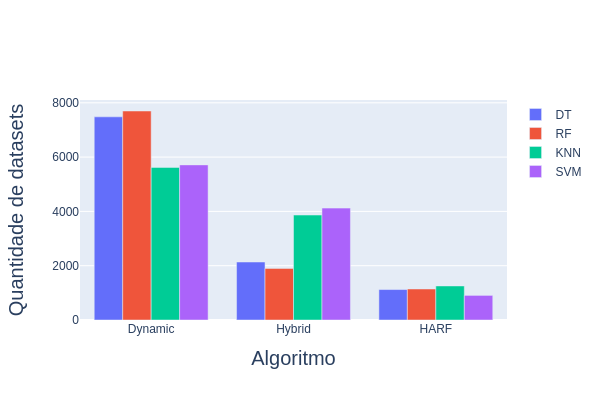

In [35]:
displayChartAlgoDistribution(metabasesMultipleClassNoHyper, 'BestVotingAlgo')

#### Best Ensamble algo distributions

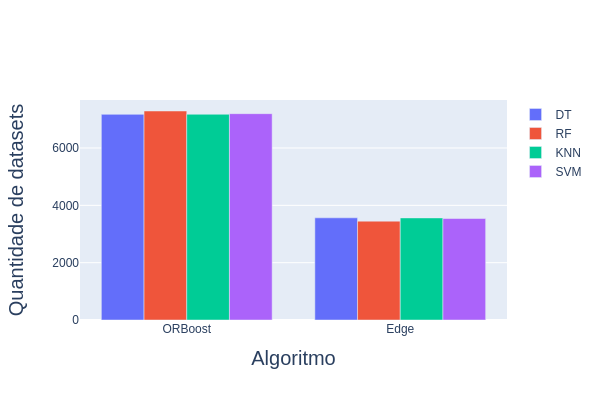

In [36]:
displayChartAlgoDistribution(metabasesMultipleClassNoHyper, 'BestEnsambleAlgo')

#### Best Distance algo distributions

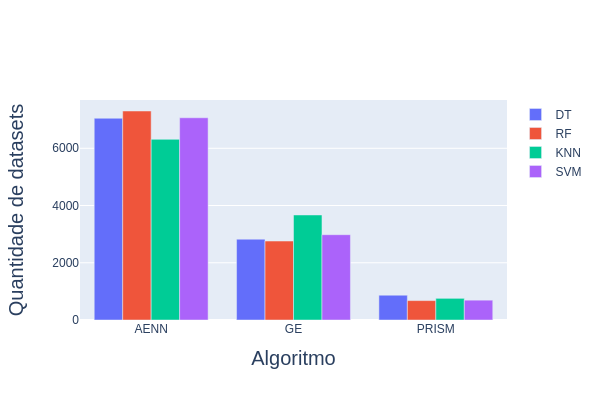

In [37]:
displayChartAlgoDistribution(metabasesMultipleClassNoHyper, 'BestDistanceAlgo')

# Base Analysis

## Ranking

### With hyper parameters

In [38]:
RFPredictRank = pd.read_csv('RankingResults/results_RF_f1-score-DT.csv.zip', index_col='Dataset')
# RFPredictRank.drop('test_f1_macro_mean_AENN', axis=1, inplace=True)
rank2 = pd.DataFrame()
for i, a in enumerate(RFPredictRank.index):
    rank2 = rank2.append(RFPredictRank.iloc[i].rank(method = 'dense', ascending = False))

meta_data = pd.read_csv(f'Metabases/Metabase_DT.csv.zip', index_col='Dataset').iloc[:,97:]
fixedCols = meta_data.columns
fixedCols2 = ['test_f1_macro_mean_AENN-5', 'test_f1_macro_mean_edgeBoostFilter-15','test_f1_macro_mean_PRISM', 'test_f1_macro_mean_HARF-70',
       'test_f1_macro_mean_GE-5', 'test_f1_macro_mean_dynamicCF','test_f1_macro_mean_hybridRepairFilter','test_f1_macro_mean_ORBoost-11']

def computeMethodGain(predictRankResult, fixedCols, gaindf):
    rank = pd.DataFrame()
    df = predictRankResult[fixedCols]
    for i, a in enumerate(df.index):
        rank = rank.append(df.iloc[i].rank(method = 'dense', ascending = False))
    total = 0
    rank = rank[fixedCols]
    if len(fixedCols)>20:
        rank.columns = ['Edge5', 'Edge20', 'HARF85', 'Hybrid', 'Edge15', 'OR3', 'GE9', 'AENN7',
       'HARF75', 'OR19', 'AENN11', 'AENN9', 'OR11', 'PRISM', 'GE3', 'GE7',
       'OR15', 'Dynamic', 'Edge10', 'HARF80', 'AENN3', 'HARF90', 'OR7',
       'HARF70', 'GE5', 'AENN5', 'GE11']
    else:
        rank.columns = [ 'AENN5', 'Edge15', 'PRISM', 'HARF70', 'GE5', 'Dynamic', 'Hybrid', 'OR11']
    for index, value  in enumerate(rank.idxmin(axis =1)):
        total += gaindf[value].iloc[index]
    return total

predictRankResult = pd.read_csv('RankingResults/results_RF_f1-score-RF.csv.zip', index_col='Dataset')
computeMethodGain(predictRankResult, fixedCols2, gain['RF'])


2373.223202884717

In [40]:
def getFolderFilesList(path):
    return [filename for filename in listdir(path) if isfile(join(path, filename))]
resultNameList = {'RF': [], 'DT': [], 'KNN': [], 'SVM': []}
resultNameListNoHyper = {'RF': [], 'DT': [], 'KNN': [], 'SVM': []}
for i in getFolderFilesList('RankingResults'):
    if i[-4:] == '.zip':
        if 'NoHyper' in i:
            if '-RF'in i:
                resultNameListNoHyper['RF'].append(i)
            if '-DT'in i:
                resultNameListNoHyper['DT'].append(i)
            if '-KNN'in i:
                resultNameListNoHyper['KNN'].append(i)
            if '-SVM'in i:
                resultNameListNoHyper['SVM'].append(i)
        else:
            if '-RF'in i:
                resultNameList['RF'].append(i)
            if '-DT'in i:
                resultNameList['DT'].append(i)
            if '-KNN'in i:
                resultNameList['KNN'].append(i)
            if '-SVM'in i:
                resultNameList['SVM'].append(i)

resultNameList

gainMetabase = None
usedCols = None
MtLRankingGain = {'RF': {}, 'DT': {}, 'KNN': {}, 'SVM': {}}
hypertype = None
for i in resultNameList:
    for resultFileName in resultNameList[i]:
        predictRankResult = pd.read_csv(f'RankingResults/{resultFileName}', index_col='Dataset')
        if 'NoHyper' in resultFileName:
            usedCols = fixedCols2
            hypertype = '-NoHyper'
        else:
            usedCols = fixedCols
            hypertype = ''
        if '_RF'in resultFileName:
            MtLRankingGain[i][f'MtL-RF'] = [computeMethodGain(predictRankResult, usedCols, gain[i])]
        if '_GB'in resultFileName:
            MtLRankingGain[i][f'MtL-GB'] = [computeMethodGain(predictRankResult, usedCols, gain[i])]
        if '_KNN'in resultFileName:
            MtLRankingGain[i][f'MtL-KNN'] = [computeMethodGain(predictRankResult, usedCols, gain[i])]
MtLRankingGain

{'RF': {'MtL-GB': [2410.550995578408],
  'MtL-KNN': [1718.0776223317755],
  'MtL-RF': [2423.9347994195787]},
 'DT': {'MtL-GB': [2620.1770611748884],
  'MtL-KNN': [1943.10550204404],
  'MtL-RF': [2633.847322159245]},
 'KNN': {'MtL-GB': [1877.0659363256073],
  'MtL-KNN': [1255.3177995555],
  'MtL-RF': [1892.6480486241294]},
 'SVM': {'MtL-KNN': [1094.9753701055085],
  'MtL-RF': [1709.3375238159788],
  'MtL-GB': [1682.3174549253874]}}

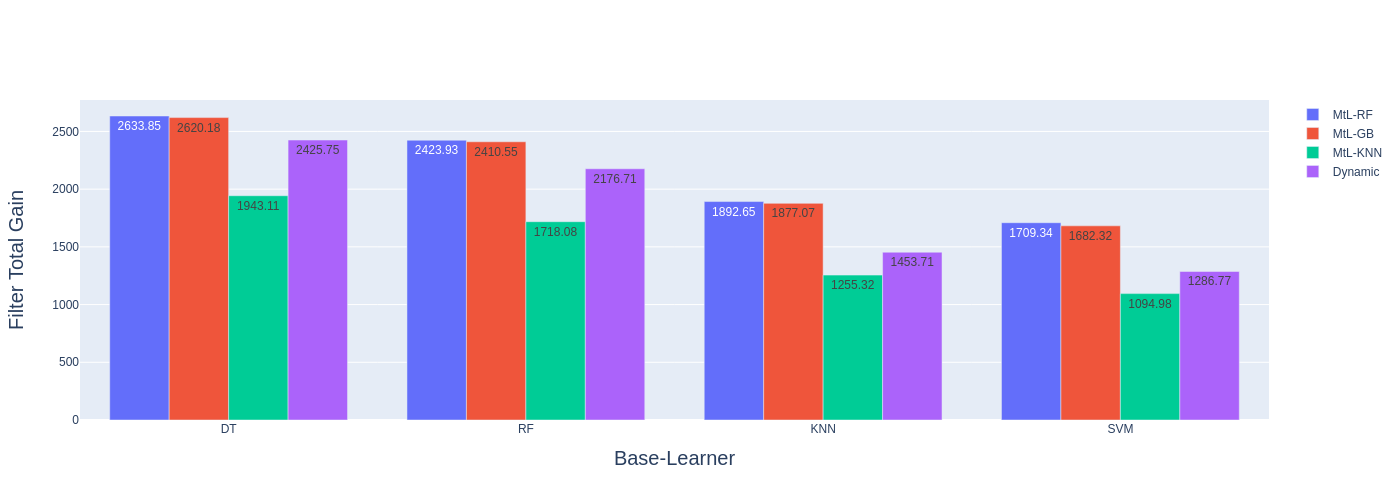

In [43]:
def plotMtLGain(MtLGain):
    df = pd.DataFrame()
    df0 = pd.DataFrame.from_dict(MtLGain['DT'])
    df1 = pd.DataFrame.from_dict(MtLGain['RF'])
    df2 = pd.DataFrame.from_dict(MtLGain['KNN'])
    df3 = pd.DataFrame.from_dict(MtLGain['SVM'])
    df0['Dynamic'] = gain['DT'].sum()['Dynamic']
    df1['Dynamic'] = gain['RF'].sum()['Dynamic']
    df2['Dynamic'] = gain['KNN'].sum()['Dynamic']
    df3['Dynamic'] = gain['SVM'].sum()['Dynamic']

    df0 = df0.T
    df1 = df1.T
    df2 = df2.T
    df3 = df3.T

    df0['Baselearner'] = 'DT'
    df1['Baselearner'] = 'RF'
    df2['Baselearner'] = 'KNN'
    df3['Baselearner'] = 'SVM'

    df = pd.concat([df0, df1, df2, df3])
    df['type'] = df.index

    fig = go.Figure()
    fig.add_trace(
        go.Bar(
            y = df[df['type'] == 'MtL-RF'][0].values,
            x = df[df['type'] == 'MtL-RF']['Baselearner'].values,
            name= 'MtL-RF',
            text = np.around(df[df['type'] == 'MtL-RF'][0].values, 2),
        ))
    fig.add_trace(
        go.Bar(
            y = df[df['type'] == 'MtL-GB'][0].values,
            x = df[df['type'] == 'MtL-GB']['Baselearner'].values,
            name= 'MtL-GB',
            text = np.around(df[df['type'] == 'MtL-GB'][0].values, 2),

        ))
    fig.add_trace(
        go.Bar(
            y = df[df['type'] == 'MtL-KNN'][0].values,
            x = df[df['type'] == 'MtL-KNN']['Baselearner'].values,
            name= 'MtL-KNN',
            text = np.around(df[df['type'] == 'MtL-KNN'][0].values, 2),
            
        ))
    fig.add_trace(
        go.Bar(
            y = df[df['type'] == 'Dynamic'][0].values,
            x = df[df['type'] == 'Dynamic']['Baselearner'].values,
            name= 'Dynamic',
            text = np.around(df[df['type'] == 'Dynamic'][0].values, 2),

        ))
    fig.update_layout(
        autosize=False,
        width=800,
        height=1000,
        yaxis=dict(
            title_text="Filter Total Gain",
            titlefont=dict(size=20),
        ),
        xaxis=dict(
            title_text="Base-Learner",
            titlefont=dict(size=20),
        )
    )

    fig.show(renderer="png", width=1400,
                height=500)
plotMtLGain(MtLRankingGain)

### without Hyper Parameters

In [44]:
gainMetabase = None
usedCols = None
MtLRankingGainNoHyper = {'RF': {}, 'DT': {}, 'KNN': {}, 'SVM': {}}
hypertype = None
for i in resultNameListNoHyper:
    for resultFileName in resultNameListNoHyper[i]:
        predictRankResult = pd.read_csv(f'RankingResults/{resultFileName}', index_col='Dataset')
        if 'NoHyper' in resultFileName:
            usedCols = fixedCols2
            hypertype = '-NoHyper'
        else:
            usedCols = fixedCols
            hypertype = ''
        if '_RF'in resultFileName:
            MtLRankingGainNoHyper[i][f'MtL-RF'] = [computeMethodGain(predictRankResult, usedCols, gain[i])]
        if '_GB'in resultFileName:
            MtLRankingGainNoHyper[i][f'MtL-GB'] = [computeMethodGain(predictRankResult, usedCols, gain[i])]
        if '_KNN'in resultFileName:
            MtLRankingGainNoHyper[i][f'MtL-KNN'] = [computeMethodGain(predictRankResult, usedCols, gain[i])]
MtLRankingGainNoHyper

{'RF': {'MtL-GB': [2361.8595483327417],
  'MtL-RF': [2362.171903110022],
  'MtL-KNN': [1820.247839421508]},
 'DT': {'MtL-KNN': [2031.1826255222984],
  'MtL-GB': [2588.8118916914127],
  'MtL-RF': [2582.9961996735783]},
 'KNN': {'MtL-RF': [1766.0008249183604],
  'MtL-GB': [1724.0897895038706],
  'MtL-KNN': [1185.1068826712751]},
 'SVM': {'MtL-RF': [1625.2777944043228],
  'MtL-KNN': [1029.1960402986408],
  'MtL-GB': [1564.7323675584696]}}

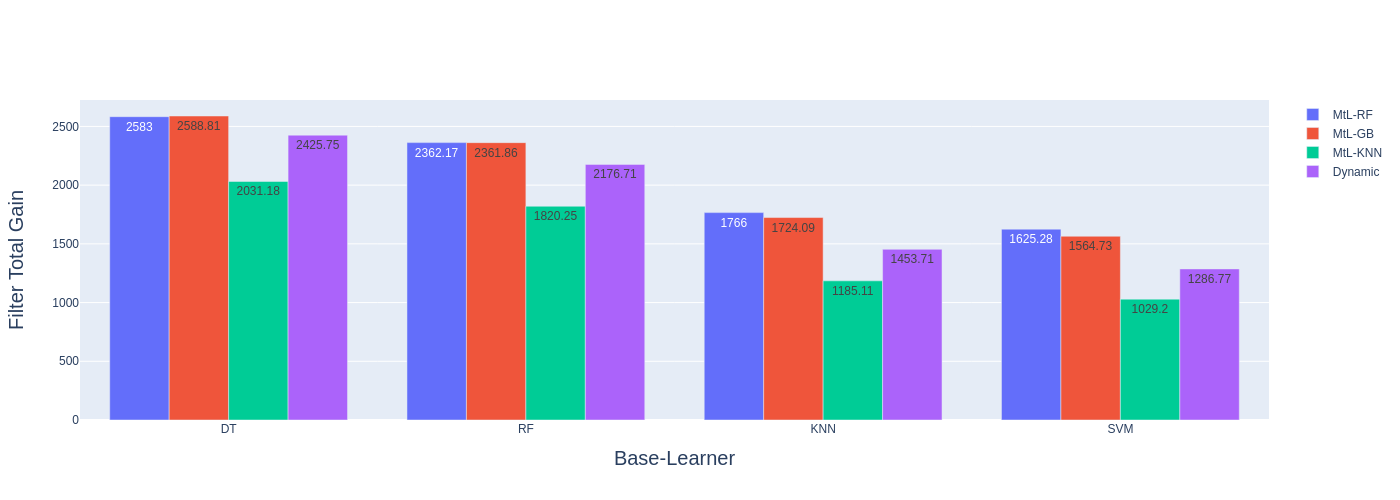

In [45]:
plotMtLGain(MtLRankingGainNoHyper)

## Multi Class

In [46]:
def returnSelectedAlgorithms(df = None):
    best_algo ={}
    for index, row in df.iterrows():
        best_algo[index] = row[f'Best{row["BestType"]}Algo']
        if best_algo[index] == 'ORBoost':
            best_algo[index] = row['BestOR']
        if best_algo[index] == 'AENN':
            best_algo[index] = row['BestAenn']
        if best_algo[index] == 'GE':
            best_algo[index] = row['BestGE']
        if best_algo[index] == 'HARF':
            best_algo[index]= row['BestHARF']
        if best_algo[index] == 'Edge':
            best_algo[index] = row['BestEdge']
    return pd.DataFrame.from_dict(best_algo, orient= 'index', columns=["SelectedAlgo"])

def returnSelectedAlgorithmsNoHyper(df = None):
    best_algo ={}
    for index, row in df.iterrows():
        best_algo[index] = row[f'Best{row["BestType"]}Algo']
    return pd.DataFrame.from_dict(best_algo, orient= 'index', columns=["SelectedAlgo"])


def getBestAlgorithmsListNoHyper(metabase):
    meta_data = pd.read_csv(f'Metabases/Metabase_DT.csv.zip', index_col='Dataset').iloc[:,97:]
    cols = meta_data.columns
    meta_data = pd.read_csv(f'Metabases/Metabase_{metabase}.csv.zip', index_col='Dataset')[cols]
    meta_data.columns = ['Edge5','Edge20', 'HARF85','Hybrid', 'Edge15',  'OR3','GE9', 'AENN7',
        'HARF75', 'OR19','AENN11', 'AENN9','OR11', 'PRISM','GE3', 'GE7',
        'OR15', 'Dynamic','Edge10', 'HARF80','AENN3', 'HARF90','OR7', 'HARF70',
        'GE5', 'AENN5','GE11']
    meta_data = meta_data[['GE5', 'AENN5', 'HARF70', 'Edge15', 'PRISM', 'Hybrid',  'OR11', 'Dynamic']]
    meta_data.columns = ['GE', 'AENN', 'HARF', 'Edge', 'PRISM', 'Hybrid',  'ORBoost', 'Dynamic']

    rank = pd.DataFrame()
    # meta_data.drop('test_f1_macro_mean_AENN',axis=1, inplace=True)
    for i, a in enumerate(meta_data.index):
        rank = rank.append(meta_data.iloc[i].rank(method = 'dense', ascending = False))
    # rank.columns = ['Edge5','Edge20', 'HARF85','Hybrid', 'Edge15', 'OR3','GE9', 'AENN7',
    #    'HARF75', 'OR19','AENN11', 'AENN9','OR11', 'PRISM','GE3', 'GE7',
    #    'OR15', 'Dynamic','Edge10', 'HARF80','AENN3', 'HARF90','OR7', 'HARF70',
    #    'GE5', 'AENN5','GE11']

    bestAlgorithmsDict ={}
    bestAlgorithmsList = []
    for index, row in rank.iterrows():
        arr = list(row[row == 1].index)
        bestAlgorithmsDict[index] = arr
        bestAlgorithmsList.append(arr)
    return bestAlgorithmsList, bestAlgorithmsDict

def getBestAlgorithmsList(metabase):
    meta_data = pd.read_csv(f'Metabases/Metabase_DT.csv.zip', index_col='Dataset').iloc[:,97:]
    cols = meta_data.columns
    meta_data = pd.read_csv(f'Metabases/Metabase_{metabase}.csv.zip', index_col='Dataset')[cols]
    rank = pd.DataFrame()
    # meta_data.drop('test_f1_macro_mean_AENN',axis=1, inplace=True)
    for i, a in enumerate(meta_data.index):
        rank = rank.append(meta_data.iloc[i].rank(method = 'dense', ascending = False))
    
    rank.columns = ['Edge5','Edge20', 'HARF85','Hybrid', 'Edge15', 'OR3','GE9', 'AENN7',
       'HARF75', 'OR19','AENN11', 'AENN9','OR11', 'PRISM','GE3', 'GE7',
       'OR15', 'Dynamic','Edge10', 'HARF80','AENN3', 'HARF90','OR7', 'HARF70',
       'GE5', 'AENN5','GE11']

    bestAlgorithmsDict ={}
    bestAlgorithmsList = []
    for index, row in rank.iterrows():
        arr = list(row[row == 1].index)
        bestAlgorithmsDict[index] = arr
        bestAlgorithmsList.append(arr)
    return bestAlgorithmsList, bestAlgorithmsDict

In [48]:
# df = pd.read_csv(f'MultipleClassifierResults/results_Multiple_RF_f1-score-DT-Hyper.csv.zip', index_col='Dataset')
df = pd.read_csv(f'MultipleClassifierResults/results_Multiple_RF_f1-score-DT-Hyper.csv.zip', index_col='Dataset')
display (df)
df0 = returnSelectedAlgorithms(df)
bestalgoList, bestalgoDict =  getBestAlgorithmsList("DT")
df0['Best'] = bestalgoList
df0

,BestType,BestEnsambleAlgo,BestDistanceAlgo,BestVotingAlgo,BestAenn,BestGE,BestOR,BestEdge,BestHARF
Dataset,,,,,,,,,
1004_synthetic_control_10_0.csv.gz,Ensamble,ORBoost,AENN,Dynamic,AENN11,GE9,OR3,Edge20,HARF70
1004_synthetic_control_10_1.csv.gz,Ensamble,ORBoost,AENN,Dynamic,AENN11,GE9,OR3,Edge20,HARF70
1004_synthetic_control_10_2.csv.gz,Ensamble,ORBoost,AENN,Dynamic,AENN11,GE11,OR7,Edge15,HARF70
1004_synthetic_control_10_3.csv.gz,Ensamble,ORBoost,AENN,Dynamic,AENN11,GE9,OR3,Edge20,HARF70
1004_synthetic_control_10_4.csv.gz,Ensamble,ORBoost,AENN,Dynamic,AENN11,GE9,OR7,Edge15,HARF70
...,...,...,...,...,...,...,...,...,...
997_balance-scale_5_5.csv.gz,Ensamble,ORBoost,AENN,Dynamic,AENN9,GE11,OR3,Edge20,HARF70
997_balance-scale_5_6.csv.gz,Ensamble,ORBoost,AENN,Dynamic,AENN11,GE9,OR3,Edge20,HARF70
997_balance-scale_5_7.csv.gz,Ensamble,ORBoost,AENN,Dynamic,AENN11,GE11,OR3,Edge20,HARF70


,SelectedAlgo,Best
1004_synthetic_control_10_0.csv.gz,OR3,[AENN11]
1004_synthetic_control_10_1.csv.gz,OR3,[Dynamic]
1004_synthetic_control_10_2.csv.gz,OR7,[HARF70]
1004_synthetic_control_10_3.csv.gz,OR3,[Hybrid]
1004_synthetic_control_10_4.csv.gz,OR7,[OR11]
...,...,...
997_balance-scale_5_5.csv.gz,OR3,[AENN5]
997_balance-scale_5_6.csv.gz,OR3,[AENN3]
997_balance-scale_5_7.csv.gz,OR3,[AENN9]
997_balance-scale_5_8.csv.gz,Dynamic,[AENN9]


In [49]:
def getFolderFilesList(path):
    return [filename for filename in listdir(path) if isfile(join(path, filename))]
resultNameList = {'RF': [], 'DT': [], 'KNN': [],'SVM': []}
resultNameListNoHyper = {'RF': [], 'DT': [], 'KNN': [], 'SVM': []}
for i in getFolderFilesList('MultipleClassifierResults'):
    if i[-4:] == '.zip':
        if 'NoHyper' in i:
            if '-RF'in i:
                resultNameListNoHyper['RF'].append(i)
            if '-DT'in i:
                resultNameListNoHyper['DT'].append(i)
            if '-KNN'in i:
                resultNameListNoHyper['KNN'].append(i)
            if '-SVM'in i:
                resultNameListNoHyper['SVM'].append(i)
        else:
            if '-RF'in i:
                resultNameList['RF'].append(i)
            if '-DT'in i:
                resultNameList['DT'].append(i)
            if '-KNN'in i:
                resultNameList['KNN'].append(i)
            if '-SVM'in i:
                resultNameList['SVM'].append(i)
resultNameList

{'RF': ['results_Multiple_RF_f1-score-RF-Hyper.csv.zip',
  'results_Multiple_GB_f1-score-RF.csv.zip',
  'results_Multiple_KNN_f1-score-RF-Hyper.csv.zip'],
 'DT': ['results_Multiple_GB_f1-score-DT.csv.zip',
  'results_Multiple_KNN_f1-score-DT-Hyper.csv.zip',
  'results_Multiple_RF_f1-score-DT-Hyper.csv.zip'],
 'KNN': ['results_Multiple_KNN_f1-score-KNN-Hyper.csv.zip',
  'results_Multiple_RF_f1-score-KNN-Hyper.csv.zip',
  'results_Multiple_GB_f1-score-KNN.csv.zip'],
 'SVM': ['results_Multiple_GB_f1-score-SVM.csv.zip',
  'results_Multiple_RF_f1-score-SVM-Hyper.csv.zip',
  'results_Multiple_KNN_f1-score-SVM-Hyper.csv.zip']}

In [50]:
df0 [df0['SelectedAlgo'].isin(df0['Best'])]
arr = []
for index, row in df0.iterrows():
    arr.append(row['SelectedAlgo'] in row['Best'])
sum(arr)

3444

In [62]:
gainMetabase = None
usedCols = None
MtLClassGain = {'RF': {}, 'DT': {}, 'KNN': {}, 'SVM': {}}
hypertype = None
for i in resultNameList:
    for resultFileName in resultNameList[i]:
        predictRankResult = pd.read_csv(f'MultipleClassifierResults/{resultFileName}', index_col='Dataset')
        df0 = returnSelectedAlgorithms(predictRankResult)
        df0['SelectedAlgo'] = df0['SelectedAlgo'].replace(['ORBoost', 'Edge', 'HARF', 'GE', 'AENN', 'Prism'], ['OR11', 'Edge15', 'HARF70', 'GE5', 'AENN5', 'PRISM'])
        
        total = 0
        for index, row in df0.iterrows():
            total += gain[i].loc[index][row['SelectedAlgo']]
        # df0['SelectedAlgo'].value_counts()
        total

        if 'NoHyper' in resultFileName:
            usedCols = fixedCols2
            hypertype = '-NoHyper'
        else:
            usedCols = fixedCols
            hypertype = ''
        if '_RF'in resultFileName:
            MtLClassGain[i][f'MtL-RF'] = [total]
        if '_GB'in resultFileName:
            MtLClassGain[i][f'MtL-GB'] = [total]
        if '_KNN'in resultFileName:
            MtLClassGain[i][f'MtL-KNN'] = [total]
display(MtLClassGain)

gainMetabase = None
usedCols = None
MtLClassGainNoHyper = {'RF': {}, 'DT': {}, 'KNN': {}, 'SVM': {}}
hypertype = None
for i in resultNameListNoHyper:
    for resultFileName in resultNameListNoHyper[i]:
        predictRankResult = pd.read_csv(f'MultipleClassifierResults/{resultFileName}', index_col='Dataset')
        df0 = returnSelectedAlgorithmsNoHyper(predictRankResult)
        df0['SelectedAlgo'] = df0['SelectedAlgo'].replace(['ORBoost', 'Edge', 'HARF', 'GE', 'AENN', 'Prism'], ['OR11', 'Edge15', 'HARF70', 'GE5', 'AENN5', 'PRISM'])
        
        total = 0
        for index, row in df0.iterrows():
            total += gain[i].loc[index][row['SelectedAlgo']]
        # df0['SelectedAlgo'].value_counts()
        total

        if 'NoHyper' in resultFileName:
            usedCols = fixedCols2
            hypertype = '-NoHyper'
        else:
            usedCols = fixedCols
            hypertype = ''
        if '_RF'in resultFileName:
            MtLClassGainNoHyper[i][f'MtL-RF'] = [total]
        if '_GB'in resultFileName:
            MtLClassGainNoHyper[i][f'MtL-GB'] = [total]
        if '_KNN'in resultFileName:
            MtLClassGainNoHyper[i][f'MtL-KNN'] = [total]
MtLClassGainNoHyper

{'RF': {'MtL-RF': [1810.103809518364],
  'MtL-GB': [1849.528740424411],
  'MtL-KNN': [1334.1792977707426]},
 'DT': {'MtL-GB': [2047.3863221321474],
  'MtL-KNN': [1607.3251987874048],
  'MtL-RF': [2055.260728683432]},
 'KNN': {'MtL-KNN': [1157.2155779344205],
  'MtL-RF': [1567.5885034668013],
  'MtL-GB': [1586.4150637031503]},
 'SVM': {'MtL-GB': [1340.9258081473918],
  'MtL-RF': [1393.8733892816456],
  'MtL-KNN': [1063.1776747975337]}}

{'RF': {'MtL-RF': [1961.254323054394],
  'MtL-GB': [1889.975437878757],
  'MtL-KNN': [1429.861632797424]},
 'DT': {'MtL-KNN': [1784.850209769302],
  'MtL-GB': [2250.4307876371236],
  'MtL-RF': [2371.4966130265425]},
 'KNN': {'MtL-GB': [1428.1816433734818],
  'MtL-RF': [1495.265303040549],
  'MtL-KNN': [1009.6576292201772]},
 'SVM': {'MtL-RF': [1209.3106370913886],
  'MtL-GB': [1175.4157631405187],
  'MtL-KNN': [820.4411860460517]}}

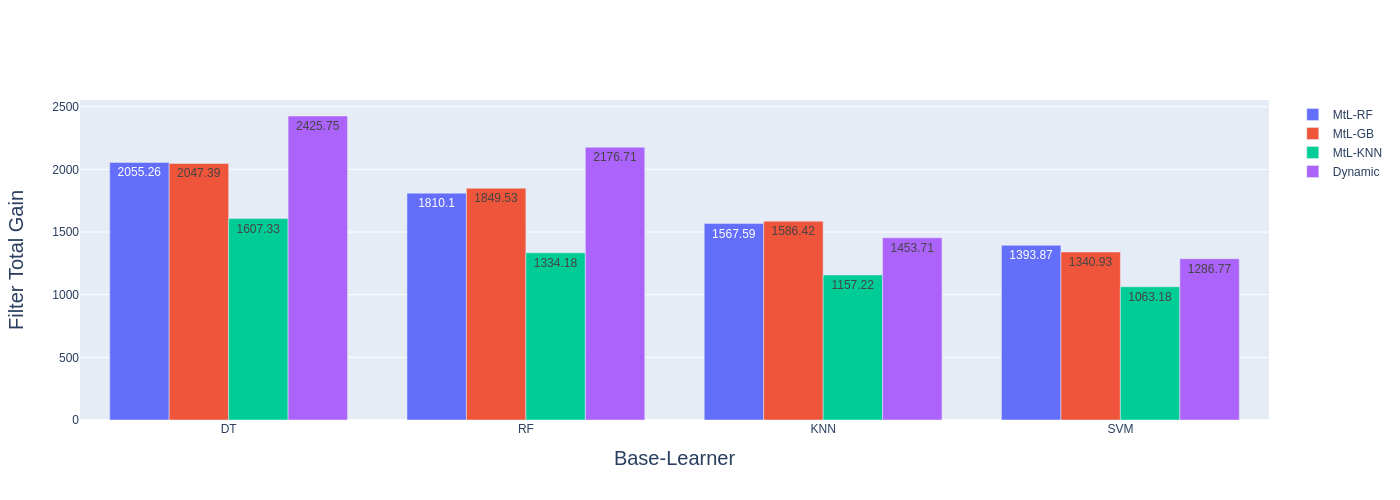

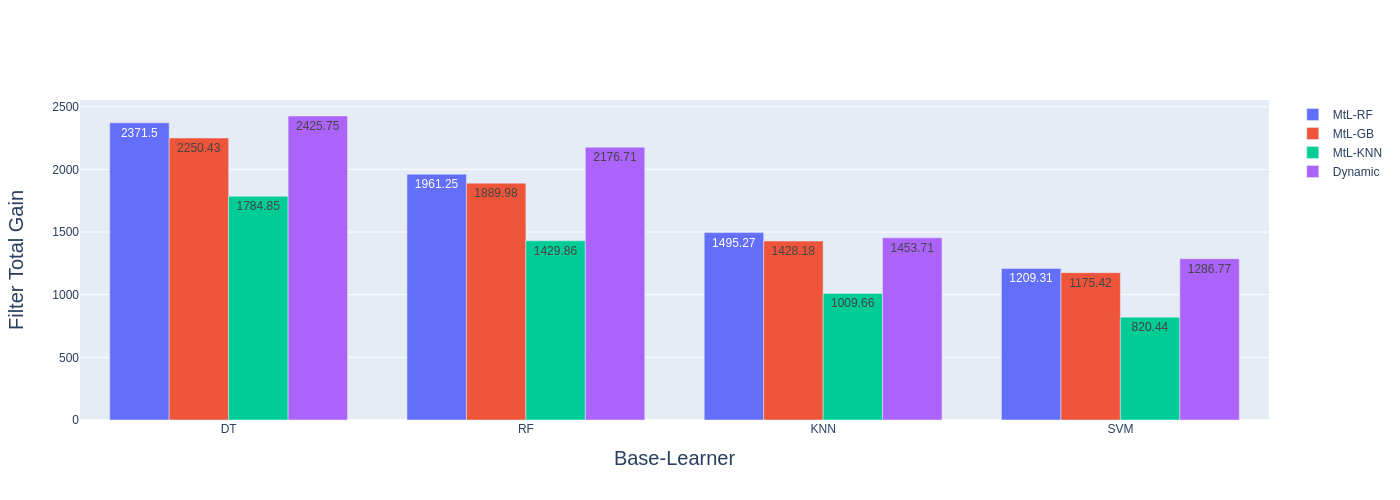

In [63]:
plotMtLGain(MtLClassGain)
plotMtLGain(MtLClassGainNoHyper)

# Meta Analysis

## Ranking

In [64]:
ranks = buildRanks(metabasesRanking)
ranks['DT']

,Edge5,Edge20,HARF85,Hybrid,Edge15,OR3,GE9,AENN7,HARF75,OR19,...,Edge10,HARF80,AENN3,HARF90,OR7,HARF70,GE5,AENN5,GE11,noFilterResults
1004_synthetic_control_10_0.csv.gz,26.0,12.0,20.0,11.0,22.0,4.0,14.0,10.0,13.0,7.0,...,23.0,19.0,16.0,27.0,8.0,9.0,21.0,18.0,17.0,28.0
1004_synthetic_control_10_1.csv.gz,25.0,2.0,21.0,11.0,27.0,4.0,8.0,6.0,3.0,13.0,...,28.0,17.0,22.0,24.0,16.0,10.0,12.0,19.0,7.0,26.0
1004_synthetic_control_10_2.csv.gz,26.0,12.0,23.0,9.0,24.0,5.0,15.0,13.0,3.0,8.0,...,27.0,20.0,17.0,25.0,6.0,1.0,19.0,16.0,14.0,28.0
1004_synthetic_control_10_3.csv.gz,23.0,20.0,17.0,1.0,19.0,2.0,5.0,3.0,8.0,13.0,...,24.0,15.0,16.0,22.0,2.0,12.0,14.0,18.0,9.0,25.0
1004_synthetic_control_10_4.csv.gz,27.0,12.0,24.0,8.0,16.0,22.0,9.0,15.0,14.0,10.0,...,25.0,5.0,21.0,26.0,6.0,11.0,17.0,13.0,19.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997_balance-scale_5_5.csv.gz,27.0,22.0,18.0,16.0,28.0,11.0,15.0,5.0,19.0,7.0,...,26.0,21.0,4.0,24.0,8.0,20.0,17.0,1.0,12.0,25.0
997_balance-scale_5_6.csv.gz,27.0,6.0,24.0,23.0,25.0,12.0,21.0,3.0,18.0,10.0,...,28.0,16.0,1.0,22.0,9.0,15.0,17.0,5.0,14.0,26.0
997_balance-scale_5_7.csv.gz,27.0,7.0,23.0,17.0,25.0,16.0,10.0,2.0,14.0,15.0,...,26.0,22.0,4.0,24.0,11.0,18.0,19.0,3.0,13.0,28.0
997_balance-scale_5_8.csv.gz,27.0,26.0,11.0,25.0,23.0,17.0,13.0,2.0,7.0,18.0,...,24.0,8.0,5.0,22.0,12.0,6.0,21.0,4.0,20.0,28.0


In [65]:
def getTopKAlgorithmsList(metabase, K):
    meta_data = pd.read_csv(f'Metabases/Metabase_DT.csv.zip', index_col='Dataset').iloc[:,97:]
    cols = meta_data.columns
    meta_data = pd.read_csv(f'Metabases/Metabase_{metabase}.csv.zip', index_col='Dataset')[cols]
    rank = pd.DataFrame()
    # meta_data.drop('test_f1_macro_mean_AENN',axis=1, inplace=True)
    for i, a in enumerate(meta_data.index):
        rank = rank.append(meta_data.iloc[i].rank(method = 'dense', ascending = False))
    
    rank.columns = ['Edge5','Edge20', 'HARF85','Hybrid', 'Edge15', 'OR3','GE9', 'AENN7',
       'HARF75', 'OR19','AENN11', 'AENN9','OR11', 'PRISM','GE3', 'GE7',
       'OR15', 'Dynamic','Edge10', 'HARF80','AENN3', 'HARF90','OR7', 'HARF70',
       'GE5', 'AENN5','GE11']

    bestAlgorithmsDict ={}
    bestAlgorithmsList = []
    for index, row in rank.iterrows():
        arr = list(row[row <= K].index)
        bestAlgorithmsDict[index] = arr
        bestAlgorithmsList.append(arr)
    return bestAlgorithmsList, bestAlgorithmsDict

def getTopKAlgorithmsListNoHyper(metabase, K):
    meta_data = pd.read_csv(f'Metabases/Metabase_DT.csv.zip', index_col='Dataset').iloc[:,97:]
    cols = meta_data.columns
    meta_data = pd.read_csv(f'Metabases/Metabase_{metabase}.csv.zip', index_col='Dataset')[cols]
    rank = pd.DataFrame()
    meta_data.columns = ['Edge5','Edge20', 'HARF85','Hybrid', 'Edge15',  'OR3','GE9', 'AENN7',
        'HARF75', 'OR19','AENN11', 'AENN9','OR11', 'PRISM','GE3', 'GE7',
        'OR15', 'Dynamic','Edge10', 'HARF80','AENN3', 'HARF90','OR7', 'HARF70',
        'GE5', 'AENN5','GE11']
    meta_data = meta_data[['GE5', 'AENN5', 'HARF70', 'Edge15', 'PRISM', 'Hybrid',  'OR11', 'Dynamic']]
    meta_data.columns = ['GE', 'AENN', 'HARF', 'Edge', 'PRISM', 'Hybrid',  'ORBoost', 'Dynamic']

    # meta_data.drop('test_f1_macro_mean_AENN',axis=1, inplace=True)
    for i, a in enumerate(meta_data.index):
        rank = rank.append(meta_data.iloc[i].rank(method = 'dense', ascending = False))

    bestAlgorithmsDict ={}
    bestAlgorithmsList = []
    for index, row in rank.iterrows():
        arr = list(row[row <= K].index)
        bestAlgorithmsDict[index] = arr
        bestAlgorithmsList.append(arr)
    return bestAlgorithmsList, bestAlgorithmsDict

def returnTopKAccuracy(predictRankResult, Cols, bestAlgorithmsList):
    rank = pd.DataFrame()
    df = predictRankResult[Cols]
    for i, a in enumerate(df.index):
        rank = rank.append(df.iloc[i].rank(method = 'dense', ascending = False))
    total = 0
    rank = rank[Cols]
    if len(Cols)>20:
        rank.columns = ['Edge5', 'Edge20', 'HARF85', 'Hybrid', 'Edge15', 'OR3', 'GE9', 'AENN7',
       'HARF75', 'OR19', 'AENN11', 'AENN9', 'OR11', 'PRISM', 'GE3', 'GE7',
       'OR15', 'Dynamic', 'Edge10', 'HARF80', 'AENN3', 'HARF90', 'OR7',
       'HARF70', 'GE5', 'AENN5', 'GE11']
    else:
        rank.columns = [ 'AENN', 'Edge', 'PRISM', 'HARF', 'GE', 'Dynamic', 'Hybrid', 'ORBoost']
    for index, value  in enumerate(rank.idxmin(axis =1)):
        total += ((value in bestAlgorithmsList[index])*1)
    return total

In [66]:
fixedCols2

['test_f1_macro_mean_AENN-5',
 'test_f1_macro_mean_edgeBoostFilter-15',
 'test_f1_macro_mean_PRISM',
 'test_f1_macro_mean_HARF-70',
 'test_f1_macro_mean_GE-5',
 'test_f1_macro_mean_dynamicCF',
 'test_f1_macro_mean_hybridRepairFilter',
 'test_f1_macro_mean_ORBoost-11']

In [30]:
# RFPredictRank = pd.read_csv('RankingResults/results_RF_f1-score-DT.csv.zip', index_col='Dataset')
bestAlgorithmsList, bestAlgorithmsDict = getTopKAlgorithmsList('DT', 1)
returnTopKAccuracy(RFPredictRank, fixedCols, bestAlgorithmsList)

3062

In [69]:
resultNameList = {'RF': [], 'DT': [], 'KNN': [], 'SVM': []}
resultNameListNoHyper = {'RF': [], 'DT': [], 'KNN': [], 'SVM': []}
for i in getFolderFilesList('RankingResults'):
    if i[-4:] == '.zip':
        if 'NoHyper' in i:
            if '-RF'in i:
                resultNameListNoHyper['RF'].append(i)
            if '-DT'in i:
                resultNameListNoHyper['DT'].append(i)
            if '-KNN'in i:
                resultNameListNoHyper['KNN'].append(i)
            if '-SVM'in i:
                resultNameListNoHyper['SVM'].append(i)
        else:
            if '-RF'in i:
                resultNameList['RF'].append(i)
            if '-DT'in i:
                resultNameList['DT'].append(i)
            if '-KNN'in i:
                resultNameList['KNN'].append(i)
            if '-SVM'in i:
                resultNameList['SVM'].append(i)

resultNameList

{'RF': ['results_GB_f1-score-RF.csv.zip',
  'results_KNN_f1-score-RF.csv.zip',
  'results_RF_f1-score-RF.csv.zip'],
 'DT': ['results_GB_f1-score-DT.csv.zip',
  'results_KNN_f1-score-DT.csv.zip',
  'results_RF_f1-score-DT.csv.zip'],
 'KNN': ['results_GB_f1-score-KNN.csv.zip',
  'results_KNN_f1-score-KNN.csv.zip',
  'results_RF_f1-score-KNN.csv.zip'],
 'SVM': ['results_KNN_f1-score-SVM.csv.zip',
  'results_RF_f1-score-SVM.csv.zip',
  'results_GB_f1-score-SVM.csv.zip']}

In [70]:

gainMetabase = None
usedCols = None
MtLRankingAccuracy = {'RF': {}, 'DT': {}, 'KNN': {}, 'SVM': {}}
hypertype = None
for i in resultNameList:
    bestAlgorithmsListT1, bestAlgorithmsDictT1 = getTopKAlgorithmsList(i, 1)
    bestAlgorithmsListT3, bestAlgorithmsDictT3 = getTopKAlgorithmsList(i, 3)
    for resultFileName in resultNameList[i]:
        predictRankResult = pd.read_csv(f'RankingResults/{resultFileName}', index_col='Dataset')
        if 'NoHyper' in resultFileName:
            usedCols = fixedCols2
            hypertype = '-NoHyper'
        else:
            usedCols = fixedCols
            hypertype = ''
        if '_RF'in resultFileName:
            MtLRankingAccuracy[i][f'MtL-RF'] = [returnTopKAccuracy(predictRankResult, fixedCols, bestAlgorithmsListT1), returnTopKAccuracy(predictRankResult, fixedCols, bestAlgorithmsListT3)]
        if '_GB'in resultFileName:
            MtLRankingAccuracy[i][f'MtL-GB'] = [returnTopKAccuracy(predictRankResult, fixedCols, bestAlgorithmsListT1), returnTopKAccuracy(predictRankResult, fixedCols, bestAlgorithmsListT3)]
        if '_KNN'in resultFileName:
            MtLRankingAccuracy[i][f'MtL-KNN'] = [returnTopKAccuracy(predictRankResult, fixedCols, bestAlgorithmsListT1), returnTopKAccuracy(predictRankResult, fixedCols, bestAlgorithmsListT3)]
MtLRankingAccuracy

{'RF': {'MtL-GB': [2446, 5090],
  'MtL-KNN': [2320, 4768],
  'MtL-RF': [2784, 5558]},
 'DT': {'MtL-GB': [2869, 5411],
  'MtL-KNN': [2388, 4818],
  'MtL-RF': [3062, 5719]},
 'KNN': {'MtL-GB': [2532, 5463],
  'MtL-KNN': [2136, 4542],
  'MtL-RF': [2751, 5638]},
 'SVM': {'MtL-KNN': [2571, 5306],
  'MtL-RF': [3067, 5916],
  'MtL-GB': [2770, 5549]}}

In [71]:
gainMetabase = None
usedCols = None
MtLRankingAccuracyNoHyper = {'RF': {}, 'DT': {}, 'KNN': {}, 'SVM': {}}
hypertype = None
fixedCols2 = ['test_f1_macro_mean_AENN-5',
 'test_f1_macro_mean_edgeBoostFilter-15',
 'test_f1_macro_mean_PRISM',
 'test_f1_macro_mean_HARF-70',
 'test_f1_macro_mean_GE-5',
 'test_f1_macro_mean_dynamicCF',
 'test_f1_macro_mean_hybridRepairFilter',
 'test_f1_macro_mean_ORBoost-11']
for i in resultNameListNoHyper:
    bestAlgorithmsListT1, bestAlgorithmsDictT1 = getTopKAlgorithmsListNoHyper(i, 1)
    bestAlgorithmsListT3, bestAlgorithmsDictT3 = getTopKAlgorithmsListNoHyper(i, 3)
    for resultFileName in resultNameListNoHyper[i]:
        predictRankResult = pd.read_csv(f'RankingResults/{resultFileName}', index_col='Dataset')
        if 'NoHyper' in resultFileName:
            usedCols = fixedCols2
            hypertype = '-NoHyper'
        else:
            usedCols = fixedCols
            hypertype = ''
        if '_RF'in resultFileName:
            MtLRankingAccuracyNoHyper[i][f'MtL-RF'] = [returnTopKAccuracy(predictRankResult, usedCols, bestAlgorithmsListT1), returnTopKAccuracy(predictRankResult, usedCols, bestAlgorithmsListT3)]
        if '_GB'in resultFileName:
            MtLRankingAccuracyNoHyper[i][f'MtL-GB'] = [returnTopKAccuracy(predictRankResult, usedCols, bestAlgorithmsListT1), returnTopKAccuracy(predictRankResult, usedCols, bestAlgorithmsListT3)]
        if '_KNN'in resultFileName:
            MtLRankingAccuracyNoHyper[i][f'MtL-KNN'] = [returnTopKAccuracy(predictRankResult, usedCols, bestAlgorithmsListT1), returnTopKAccuracy(predictRankResult, usedCols, bestAlgorithmsListT3)]
MtLRankingAccuracyNoHyper

{'RF': {'MtL-GB': [4042, 9061],
  'MtL-RF': [4548, 9352],
  'MtL-KNN': [3947, 8199]},
 'DT': {'MtL-KNN': [4006, 8226],
  'MtL-GB': [4371, 9162],
  'MtL-RF': [4623, 9308]},
 'KNN': {'MtL-RF': [3877, 8490],
  'MtL-GB': [3690, 7885],
  'MtL-KNN': [3028, 6925]},
 'SVM': {'MtL-RF': [3977, 8598],
  'MtL-KNN': [3468, 7428],
  'MtL-GB': [3704, 7889]}}

['MtL-GB' 'MtL-KNN' 'MtL-RF' 'OR3' 'Dynamic' 'OR7']


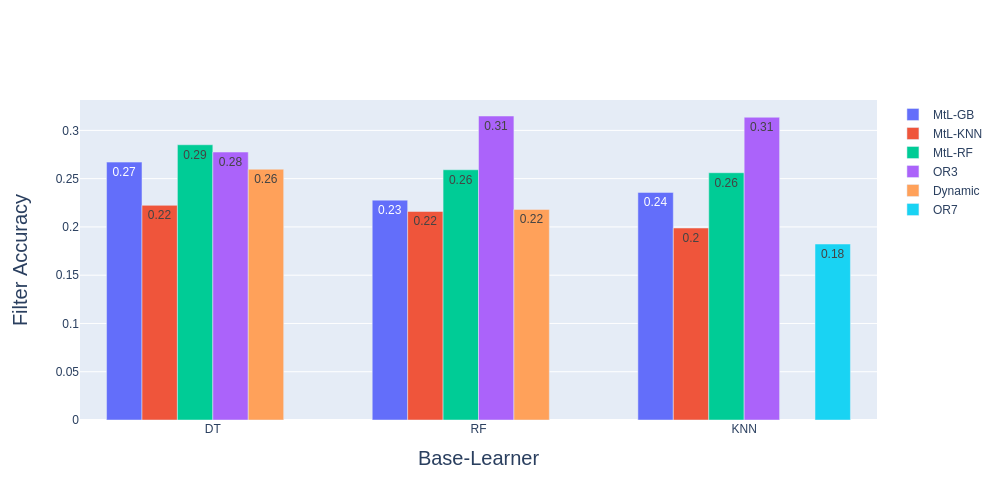

['MtL-KNN' 'MtL-GB' 'MtL-RF' 'Dynamic' 'ORBoost']


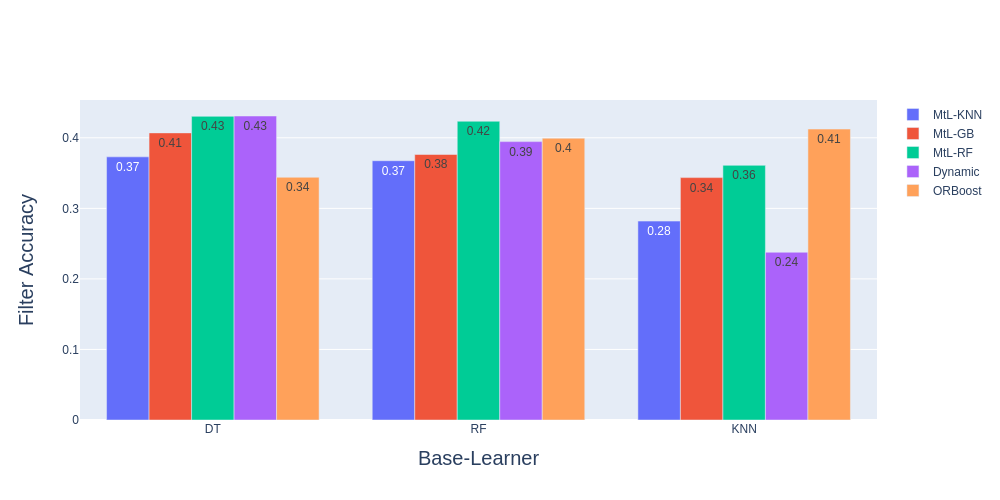

In [50]:
ranks = buildRanks(metabasesRanking)
postionsRanks = ranksToPositionRanks(ranks)
ranksNoHyper = buildRanks(metabasesRankingNoHyper)
postionsRanksNoHyper = ranksToPositionRanks(ranksNoHyper)
plotMtLAccuracy(MtLRankingAccuracy, postionsRanks)
plotMtLAccuracy(MtLRankingAccuracyNoHyper, postionsRanksNoHyper)

## Multiple Classifier

In [255]:
def getBestAlgorithmsListNoHyper(metabase):
    meta_data = pd.read_csv(f'Metabases/Metabase_DT.csv.zip', index_col='Dataset').iloc[:,97:]
    cols = meta_data.columns
    meta_data = pd.read_csv(f'Metabases/Metabase_{metabase}.csv.zip', index_col='Dataset')[cols]
    meta_data.columns = ['Edge5','Edge20', 'HARF85','Hybrid', 'Edge15',  'OR3','GE9', 'AENN7',
        'HARF75', 'OR19','AENN11', 'AENN9','OR11', 'PRISM','GE3', 'GE7',
        'OR15', 'Dynamic','Edge10', 'HARF80','AENN3', 'HARF90','OR7', 'HARF70',
        'GE5', 'AENN5','GE11']
    meta_data = meta_data[['GE5', 'AENN5', 'HARF70', 'Edge15', 'PRISM', 'Hybrid',  'OR11', 'Dynamic']]
    meta_data.columns = ['GE', 'AENN', 'HARF', 'Edge', 'PRISM', 'Hybrid',  'ORBoost', 'Dynamic']

    rank = pd.DataFrame()
    # meta_data.drop('test_f1_macro_mean_AENN',axis=1, inplace=True)
    for i, a in enumerate(meta_data.index):
        rank = rank.append(meta_data.iloc[i].rank(method = 'dense', ascending = False))
    # rank.columns = ['Edge5','Edge20', 'HARF85','Hybrid', 'Edge15', 'OR3','GE9', 'AENN7',
    #    'HARF75', 'OR19','AENN11', 'AENN9','OR11', 'PRISM','GE3', 'GE7',
    #    'OR15', 'Dynamic','Edge10', 'HARF80','AENN3', 'HARF90','OR7', 'HARF70',
    #    'GE5', 'AENN5','GE11']

    bestAlgorithmsDict ={}
    bestAlgorithmsList = []
    for index, row in rank.iterrows():
        arr = list(row[row == 1].index)
        bestAlgorithmsDict[index] = arr
        bestAlgorithmsList.append(arr)
    return bestAlgorithmsList, bestAlgorithmsDict


In [17]:
gainMetabase = None
usedCols = None
MtLRankingGain = {'RF': {}, 'DT': {}, 'KNN': {}}
hypertype = None
for i in resultNameList:
    for resultFileName in resultNameList[i]:
        predictRankResult = pd.read_csv(f'MultipleClassifierResults/{resultFileName}', index_col='Dataset')
        df0 = returnSelectedAlgorithms(predictRankResult)
        # df0['SelectedAlgo'] = df0['SelectedAlgo'].replace(['ORBoost', 'Edge', 'HARF', 'GE', 'AENN', 'Prism'], ['OR11', 'Edge15', 'HARF70', 'GE5', 'AENN5', 'PRISM'])
        bestalgoList, bestalgoDict =  getBestAlgorithmsList(i)
        df0['Best'] = bestalgoList
        # df0
        arr = []
        for index, row in df0.iterrows():
            arr.append(row['SelectedAlgo'] in row['Best'])
        total = sum(arr)

        if 'NoHyper' in resultFileName:
            usedCols = fixedCols2
            hypertype = '-NoHyper'
        else:
            usedCols = fixedCols
            hypertype = ''
        if '_RF'in resultFileName:
            MtLRankingGain[i][f'MtL-RF'] = [total]
        if '_GB'in resultFileName:
            MtLRankingGain[i][f'MtL-GB'] = [total]
        if '_KNN'in resultFileName:
            MtLRankingGain[i][f'MtL-KNN'] = [total]
display(MtLRankingGain)

gainMetabase = None
usedCols = None
MtLRankingGainNoHyper = {'RF': {}, 'DT': {}, 'KNN': {}}
hypertype = None
for i in resultNameListNoHyper:
    for resultFileName in resultNameListNoHyper[i]:
        predictRankResult = pd.read_csv(f'MultipleClassifierResults/{resultFileName}', index_col='Dataset')
        df0 = returnSelectedAlgorithmsNoHyper(predictRankResult)
        # df0['SelectedAlgo'] = df0['SelectedAlgo'].replace(['ORBoost', 'Edge', 'HARF', 'GE', 'AENN', 'Prism'], ['OR11', 'Edge15', 'HARF70', 'GE5', 'AENN5', 'PRISM'])
        bestalgoList, bestalgoDict =  getBestAlgorithmsListNoHyper(i)
        df0['Best'] = bestalgoList
        
        # df0
        arr = []
        for index, row in df0.iterrows():
            arr.append(row['SelectedAlgo'] in row['Best'])
        total = sum(arr)
        
        # df0['SelectedAlgo'].value_counts()

        if 'NoHyper' in resultFileName:
            usedCols = fixedCols2
            hypertype = '-NoHyper'
        else:
            usedCols = fixedCols
            hypertype = ''
        if '_RF'in resultFileName:
            MtLRankingGainNoHyper[i][f'MtL-RF'] = [total]
        if '_GB'in resultFileName:
            MtLRankingGainNoHyper[i][f'MtL-GB'] = [total]
        if '_KNN'in resultFileName:
            MtLRankingGainNoHyper[i][f'MtL-KNN'] = [total]
MtLRankingGainNoHyper

{'RF': {'MtL-RF': [3519], 'MtL-GB': [3502]},
 'DT': {'MtL-GB': [3343], 'MtL-RF': [3444]},
 'KNN': {'MtL-RF': [3732], 'MtL-GB': [3687]}}

{'RF': {'MtL-RF': [5213], 'MtL-GB': [4967]},
 'DT': {'MtL-GB': [5003], 'MtL-RF': [5246]},
 'KNN': {'MtL-GB': [4960], 'MtL-RF': [5029]}}

In [268]:
# ranks = buildRanks(metabasesRanking)
# postionsRanks = ranksToPositionRanks(ranks)
postionsRanks['DT'].sort_values(by=1, ascending=False).iloc[0].name
postionsRanks['DT'].sort_values(by=1, ascending=False).iloc[0][1]


2994

In [49]:
def plotMtLAccuracy(MtLGain, postionsRanks):
    df = pd.DataFrame()
    df0 = pd.DataFrame.from_dict(MtLGain['DT'])
    df1 = pd.DataFrame.from_dict(MtLGain['RF'])
    df2 = pd.DataFrame.from_dict(MtLGain['KNN'])
    
    df0[postionsRanks['DT'].sort_values(by=1, ascending=False).iloc[0].name] = postionsRanks['DT'].sort_values(by=1, ascending=False).iloc[0][1]
    df1[postionsRanks['RF'].sort_values(by=1, ascending=False).iloc[0].name] = postionsRanks['RF'].sort_values(by=1, ascending=False).iloc[0][1]
    df2[postionsRanks['KNN'].sort_values(by=1, ascending=False).iloc[0].name] = postionsRanks['KNN'].sort_values(by=1, ascending=False).iloc[0][1]
    
    df0[postionsRanks['DT'].sort_values(by=1, ascending=False).iloc[1].name] = postionsRanks['DT'].sort_values(by=1, ascending=False).iloc[1][1]
    df1[postionsRanks['RF'].sort_values(by=1, ascending=False).iloc[1].name] = postionsRanks['RF'].sort_values(by=1, ascending=False).iloc[1][1]
    df2[postionsRanks['KNN'].sort_values(by=1, ascending=False).iloc[1].name] = postionsRanks['KNN'].sort_values(by=1, ascending=False).iloc[1][1]
    
    



    df0 = df0.T
    df1 = df1.T
    df2 = df2.T

    df0['Baselearner'] = 'DT'
    df1['Baselearner'] = 'RF'
    df2['Baselearner'] = 'KNN'

    df = pd.concat([df0, df1, df2])
    df['type'] = df.index

    print(df['type'].unique())
    fig = go.Figure()
    for i in df['type'].unique():
        fig.add_trace(
            go.Bar(
                y = df[df['type'] == i][0].values /10740,
                x = df[df['type'] == i]['Baselearner'].values,
                name= i,
                text = np.around(df[df['type'] == i][0].values /10740, 2),
            ))
    fig.update_layout(
        autosize=False,
        width=800,
        height=1000,
        yaxis=dict(
            title_text="Filter Accuracy",
            titlefont=dict(size=20),
        ),
        xaxis=dict(
            title_text="Base-Learner",
            titlefont=dict(size=20),
        ),
        
    )
    # fig.add_trace(
    #     go.Bar(
    #         y = df[df['type'] == 'MtL-GB'][0].values,
    #         x = df[df['type'] == 'MtL-GB']['Baselearner'].values,
    #         name= 'MtL-GB',
    #         text = np.around(df[df['type'] == 'MtL-GB'][0].values, 2),

    #     ))
    # fig.add_trace(
    #     go.Bar(
    #         y = df[df['type'] == 'MtL-KNN'][0].values,
    #         x = df[df['type'] == 'MtL-KNN']['Baselearner'].values,
    #         name= 'MtL-KNN',
    #         text = np.around(df[df['type'] == 'MtL-KNN'][0].values, 2),
            
    #     ))
    # fig.add_trace(
    #     go.Bar(
    #         y = df[df['type'] == 'Dynamic'][0].values,
    #         x = df[df['type'] == 'Dynamic']['Baselearner'].values,
    #         name= 'Dynamic',
    #         text = np.around(df[df['type'] == 'Dynamic'][0].values, 2),
# 
        # ))

    fig.show(renderer="png", width=1000,
                height=500)


['MtL-GB' 'MtL-RF' 'OR3' 'Dynamic' 'OR7']


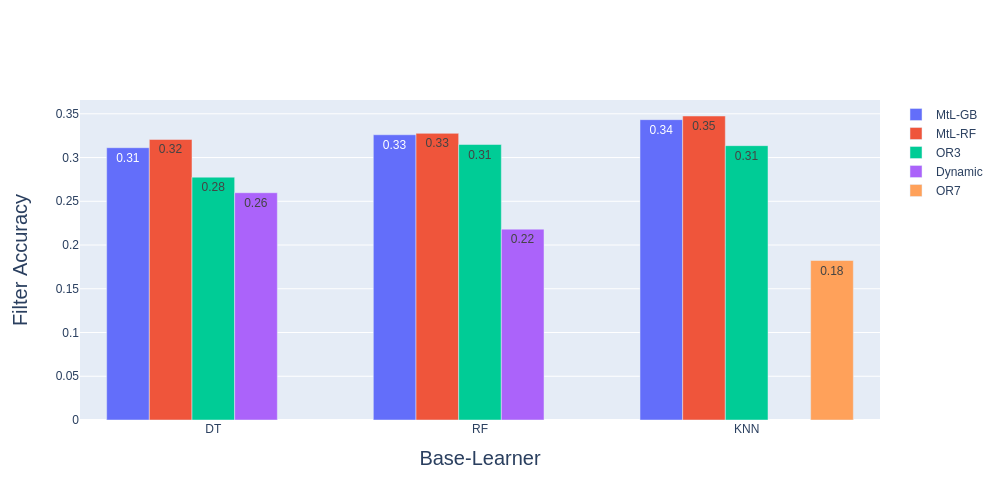

['MtL-GB' 'MtL-RF' 'Dynamic' 'ORBoost']


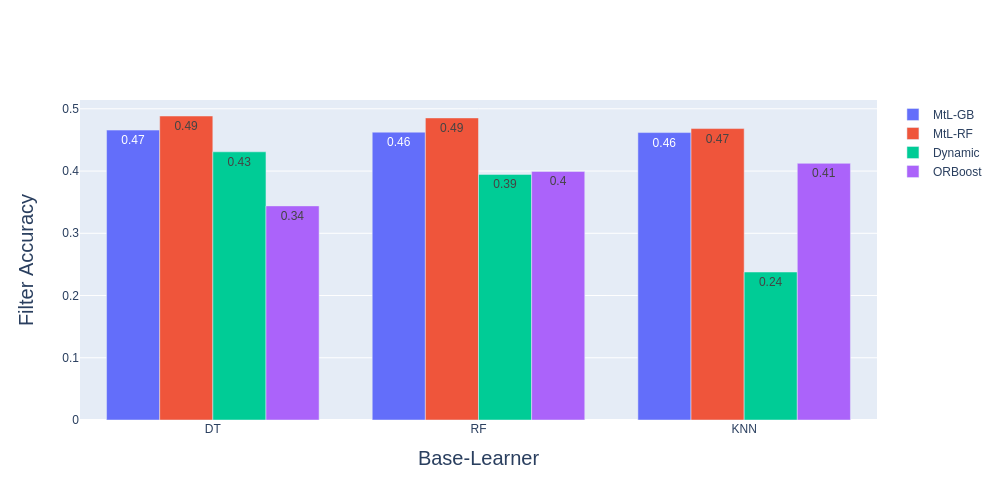

In [22]:
# ranks = buildRanks(metabasesRanking)
# postionsRanks = ranksToPositionRanks(ranks)
# ranksNoHyper = buildRanks(metabasesRankingNoHyper)
# postionsRanksNoHyper = ranksToPositionRanks(ranksNoHyper)
plotMtLAccuracy(MtLRankingGain, postionsRanks)
plotMtLAccuracy(MtLRankingGainNoHyper, postionsRanksNoHyper)